### Titanic Survival Prediction
- Using Titanic dataset to build a model that predicts whether a passenger on Titanic survived or not. This is a classic beginner project with readily available data.
- The dataset typically used for this project contains nformation about individual passengers such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

#### Dataset - https://www.kaggle.com/datasets/brendan45774/test-file

### Steps
#### Preparing the environment
1. Import the necessary files
2. Read the required files
#### Data preprocessing
3. Checking for duplicate values - No duplicates in our dataset
4. Check if the data is balanced - Our dataset is balanced
5. Train test split
6. Handling missing values
    - Age 133 (19.91%) missing in train dataset - Filled with median
    - Age 44 (19.73%) missing in test dataset - Filled with median
    - Cabin 501 (75.00%) missing in train dataset - Column droped
    - Cabin 186 (83.41%) missing in test dataset - Column droped
    - Embarked 2 (0.29%) missing in train dataset - Filled with mode
7. Handling text data
    - Name column - Droped
    - Sex column - Encoded with Label Encoder
    - Tickets column - Droped
    - Embarked column - Encoded with ONE HOT Encoder
#### Exploratory Data Analysis
8. From EDA we can conclude the below
    - We can conclude that the passenger id is insignificant as the correlation is very small, so it can be dropped.
    - We can also see that Age is also insignificant as the corellation is very low also.
#### Building models and furthur preprocessing
9. Split dependent and independent variable in both train and test.
10. Building various models on raw data without removing any columns
    - Decision Tree with Information Gain criterion and XGBoost classifier achieved the highest training and testing accuracies, indicating robust performance on the raw data, 82.9%
    - Random Forest models, both with Gini Impurity and Information Gain, demonstrated strong performance with high training of more than 90% and testing accuracies of arround 82%.
    - The SVM classifier with a linear kernel and Ridge Classifier exhibited good but slightly lower performance compared to the top-performing models, with accuracies around 78-79%.
    - AdaBoost and Gradient Boosting classifiers achieved competitive results, with testing accuracies above 77%, indicating effective ensemble learning.
    - SVM classifiers with non-linear kernels (sigmoid, poly, RBF) showed varying performance, with the poly kernel performing the best among them on the testing set, but all under 70%.
11. Scaling the data to see if the perfoemce is improved, we can observe the below.
    - Random Forest models (both Gini Impurity and Information Gain) consistently demonstrate high training and testing accuracies, with Gini Impurity achieving the highest overall accuracy on the testing set (83.86%).
    - Gradient Boosting and Decision Tree (Gini Impurity) models also perform well, with testing accuracies around 82% and 76%, respectively.
    - The SVM classifier with an RBF kernel shows notable improvement on the scaled data, achieving a testing accuracy of 83.41%, compared to 67.71% on the raw data.
    - The KNN classifier with k=5 performs better on scaled data, achieving a testing accuracy of 82.96%, compared to 73.09% on the raw data.
    - Overall, the performance of most models remains consistent or slightly improves on scaled data. Logistic Regression, Ridge Classifier, and AdaBoost show similar performance on both raw and scaled data.
12. Treating the outliers to see if we can improve the performance.
    - XGBoost Classifier achieved the highest test accuracy of 83.9%, indicating strong predictive performance on the outlier-treated dataset.
    - Bagging Classifier and Random Forest Classifier (Gini Impurity) demonstrated competitive test accuracies of 81.2% and 82.5%, respectively, showcasing the effectiveness of ensemble techniques.
    - Decision Tree (Information Gain) and Gradient Boost Classifier also performed well with test accuracies of 79.4% and 81.2%, respectively, highlighting their individual predictive capabilities.
    - SVM models exhibited varying performance. While the SVM Classifier with a Linear Kernel achieved a test accuracy of 80.3%, the models with Sigmoid, Poly, and RBF Kernels showed lower test accuracies ranging from 58.3% to 69.1%.
    - Logistic Regression and Ridge Classification demonstrated similar test accuracies of around 78.5% and 78.9%, respectively. The KNN Classifier (k = 1) achieved a test accuracy of 74.4%, placing it among the middle performers.
13. Scaling the outlier treated data, to check if the performance is increased.
    - Random Forest Classifier with Gini Impurity achieved the highest test accuracy of 84.8%, indicating strong predictive performance on the scaled outlier-treated dataset.
    - Bagging Classifier and Random Forest Classifier with Information Gain demonstrated competitive test accuracies of 81.6% and 84.3%, respectively, showcasing the effectiveness of ensemble techniques on the scaled outlier-treated data.
    - Several models, including Logistic Regression, Ridge Classification, Decision Tree (Information Gain), Gradient Boost Classifier, and XGBoost Classifier, exhibited consistent test accuracies ranging from 78.0% to 81.2%.
    - SVM models with different kernels showed varying performance. While SVM with RBF kernel achieved a test accuracy of 82.9%, the models with linear and sigmoid kernels had test accuracies of 80.3% and 69.1%, respectively.
    - The KNN Classifier with k=18 achieved a test accuracy of 84.3%, demonstrating competitive performance among the models on the scaled outlier-treated data.
##### Conslusion of building all models
14. We deduce the below from all the built models, we have the below top 4 models
    - Random Forest Classifier (Gini Impurity) - scaled outlier treated data - Training accuracy: 85.93% - Test accuracy: 84.75%
    - Random Forest Classifier (Information Gain) - scaled data - Training accuracy: 83.83% - Test accuracy: 84.30%
    - Random Forest Classifier (Information Gain) - scaled outlier treated data - Training accuracy: 83.83%- Test accuracy: 84.30%
    - KNN Classifier (k = 18) - Scaled Outlier Treated data - Training accuracy: 83.38% - Test accuracy: 84.30%
15. Cross validation to confirm the best model, we see the below 
    - After cross validation Random Forest Classifier (Gini Impurity) - scaled outlier treated data seems to be the best model
    - Building the output based on the above model
#####  Building the output file


In [1]:
import warnings
warnings.filterwarnings('ignore')

import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

sns.set
%matplotlib inline

In [2]:
# Reading the dataset into a dataframe

titanic_df = pd.read_csv("01_train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Checking for duplicate values before train test split

titanic_df.duplicated().sum()

0

In [4]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


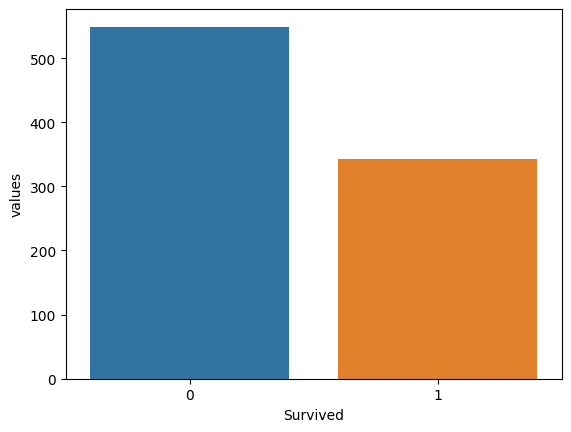

In [5]:
# Checking for data imbalance

temp = titanic_df['Survived'].value_counts()    # Counts the number of ones and zeroes in the column
temp_df = pd.DataFrame({'Survived' : temp.index, 'values' : temp.values})    # Creating a data frame with value and their counts
sns.barplot(x = 'Survived', y = 'values', data = temp_df)
plt.show()

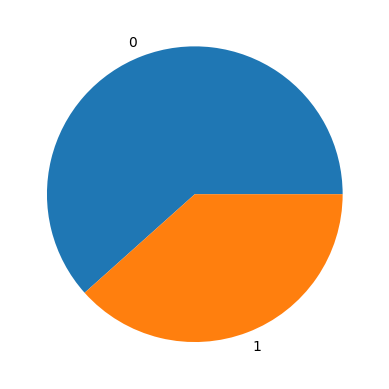

In [6]:
plt.pie(temp_df['values'], labels = [0, 1])
plt.show()

In [7]:
print("Ratio of survived to not survived : ", temp_df.loc[1][1]/temp_df.loc[0][1])

Ratio of survived to not survived :  0.6229508196721312


- From the above we can see that the data set is balanced, proceeding with the process

In [8]:
# Since we have only one data set, spliting it into train and test (validation)

train_df, validation_df = train_test_split(titanic_df, train_size = 0.75, random_state = 1, stratify = titanic_df['Survived'])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.000,A36,S
747,748,1,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.000,NaN,S
292,293,0,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.875,D,C
781,782,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,17474,57.000,B20,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.500,NaN,S


In [9]:
validation_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
391,392,1,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,7.7958,NaN,S
584,585,0,3,"Paulner, Mr. Uscher",male,NaN,0,0,3411,8.7125,NaN,C
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C


In [10]:
validation_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
391,392,1,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,7.7958,NaN,S
584,585,0,3,"Paulner, Mr. Uscher",male,NaN,0,0,3411,8.7125,NaN,C
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C


In [11]:
train_df.shape

(668, 12)

In [12]:
validation_df.shape

(223, 12)

In [13]:
# Checking for missing values in the training dataset

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 806 to 464
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  668 non-null    int64  
 1   Survived     668 non-null    int64  
 2   Pclass       668 non-null    int64  
 3   Name         668 non-null    object 
 4   Sex          668 non-null    object 
 5   Age          535 non-null    float64
 6   SibSp        668 non-null    int64  
 7   Parch        668 non-null    int64  
 8   Ticket       668 non-null    object 
 9   Fare         668 non-null    float64
 10  Cabin        167 non-null    object 
 11  Embarked     666 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 67.8+ KB


In [14]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            133
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          501
Embarked         2
dtype: int64

In [15]:
# Checking the percentage of missing values

train_df.isnull().sum()/len(train_df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.910180
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          75.000000
Embarked        0.299401
dtype: float64

In [16]:
validation_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             44
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          186
Embarked         0
dtype: int64

In [17]:
# Checking the percentage of missing values

validation_df.isnull().sum()/len(validation_df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.730942
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          83.408072
Embarked        0.000000
dtype: float64

In [18]:
# Droping cabin as significant rows are missing 

train_df = train_df.drop(['Cabin'], axis = 1)
validation_df = validation_df.drop(['Cabin'], axis = 1)

train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,S
747,748,1,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0,S


In [19]:
validation_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
391,392,1,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,7.7958,S
584,585,0,3,"Paulner, Mr. Uscher",male,NaN,0,0,3411,8.7125,C


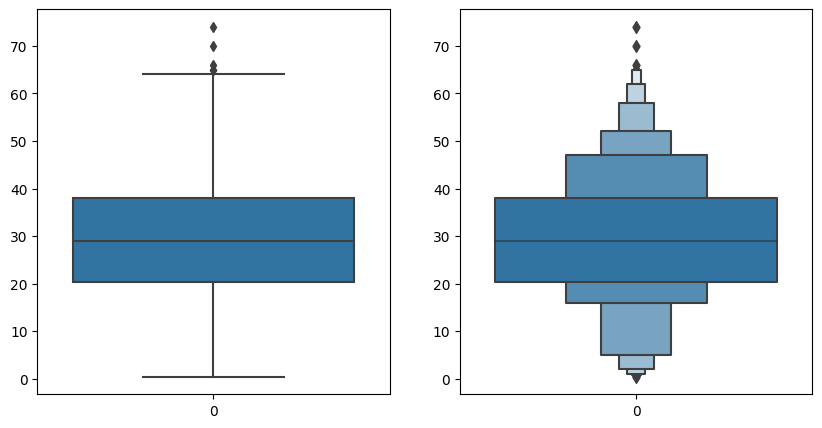

In [20]:
# Checking for outliers before imputing
# Outliers in training dataset

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(train_df['Age'])

plt.subplot(1, 2, 2)
sns.boxenplot(train_df['Age'])

plt.show()

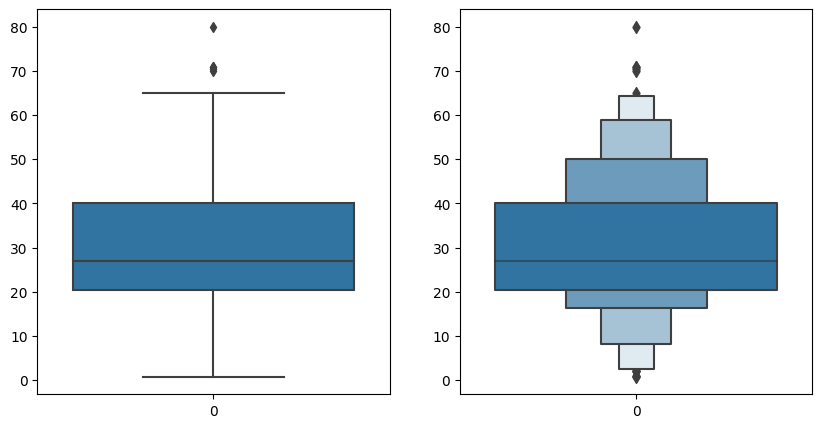

In [21]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(validation_df['Age'].values)

plt.subplot(1, 2, 2)
sns.boxenplot(validation_df['Age'].values)

plt.show()

In [22]:
# There are a few outliers in train and no outliers in validattion datasets, so imputing with median

train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 806 to 464
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  668 non-null    int64  
 1   Survived     668 non-null    int64  
 2   Pclass       668 non-null    int64  
 3   Name         668 non-null    object 
 4   Sex          668 non-null    object 
 5   Age          668 non-null    float64
 6   SibSp        668 non-null    int64  
 7   Parch        668 non-null    int64  
 8   Ticket       668 non-null    object 
 9   Fare         668 non-null    float64
 10  Embarked     666 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 78.8+ KB


In [23]:
# Imputing with the median of training dataset in validation

validation_df['Age'] = validation_df['Age'].fillna(train_df['Age'].median())
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 391 to 47
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  223 non-null    int64  
 1   Survived     223 non-null    int64  
 2   Pclass       223 non-null    int64  
 3   Name         223 non-null    object 
 4   Sex          223 non-null    object 
 5   Age          223 non-null    float64
 6   SibSp        223 non-null    int64  
 7   Parch        223 non-null    int64  
 8   Ticket       223 non-null    object 
 9   Fare         223 non-null    float64
 10  Embarked     223 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 20.9+ KB


In [24]:
# Imputing fare with the median of training dataset in validation

train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode())
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 806 to 464
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  668 non-null    int64  
 1   Survived     668 non-null    int64  
 2   Pclass       668 non-null    int64  
 3   Name         668 non-null    object 
 4   Sex          668 non-null    object 
 5   Age          668 non-null    float64
 6   SibSp        668 non-null    int64  
 7   Parch        668 non-null    int64  
 8   Ticket       668 non-null    object 
 9   Fare         668 non-null    float64
 10  Embarked     666 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 78.8+ KB


- There are no missing values in the dataset now

In [25]:
# Encoding all the object datatype variables

obj_list = train_df.select_dtypes(include = ['object']).columns.tolist()
print(obj_list)

['Name', 'Sex', 'Ticket', 'Embarked']


In [26]:
# Checking the unique values in each object column to decide if we need to use them or not

for i in obj_list:
    print("Unique values in training dataset for %s column is: %s" % (i, train_df[i].nunique()))

Unique values in training dataset for Name column is: 668
Unique values in training dataset for Sex column is: 2
Unique values in training dataset for Ticket column is: 536
Unique values in training dataset for Embarked column is: 3


In [27]:
# Droping the insignificant and more diverse object variables

train_df = train_df.drop(['Name', 'Ticket'], axis = 1)
validation_df = validation_df.drop(['Name', 'Ticket'], axis = 1)

train_df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
806,807,0,1,male,39.0,0,0,0.0,S
747,748,1,2,female,30.0,0,0,13.0,S


In [28]:
validation_df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
391,392,1,3,male,21.0,0,0,7.7958,S
584,585,0,3,male,29.0,0,0,8.7125,C


In [29]:
# Proceeding with encoding
# Label encoder on Sex column

train_df['Sex'] = train_df['Sex'].astype('category')
train_df['Sex'] = train_df['Sex'].cat.codes

validation_df['Sex'] = validation_df['Sex'].astype('category')
validation_df['Sex'] = validation_df['Sex'].cat.codes

train_df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
806,807,0,1,1,39.0,0,0,0.0,S
747,748,1,2,0,30.0,0,0,13.0,S


In [30]:
validation_df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
391,392,1,3,1,21.0,0,0,7.7958,S
584,585,0,3,1,29.0,0,0,8.7125,C


In [31]:
# ONE HOT encoder on Embarked column

train_df = pd.get_dummies(train_df, columns = ['Embarked'])
validation_df = pd.get_dummies(validation_df, columns = ['Embarked'])

train_df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
806,807,0,1,1,39.0,0,0,0.0,0,0,1
747,748,1,2,0,30.0,0,0,13.0,0,0,1


In [32]:
validation_df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
391,392,1,3,1,21.0,0,0,7.7958,0,0,1
584,585,0,3,1,29.0,0,0,8.7125,1,0,0


- Now there are no variables of object datatype in our dataframe, now we can feed it to the model

In [33]:
train_df.shape

(668, 11)

In [34]:
validation_df.shape

(223, 11)

#### Exploratory Data Analysis

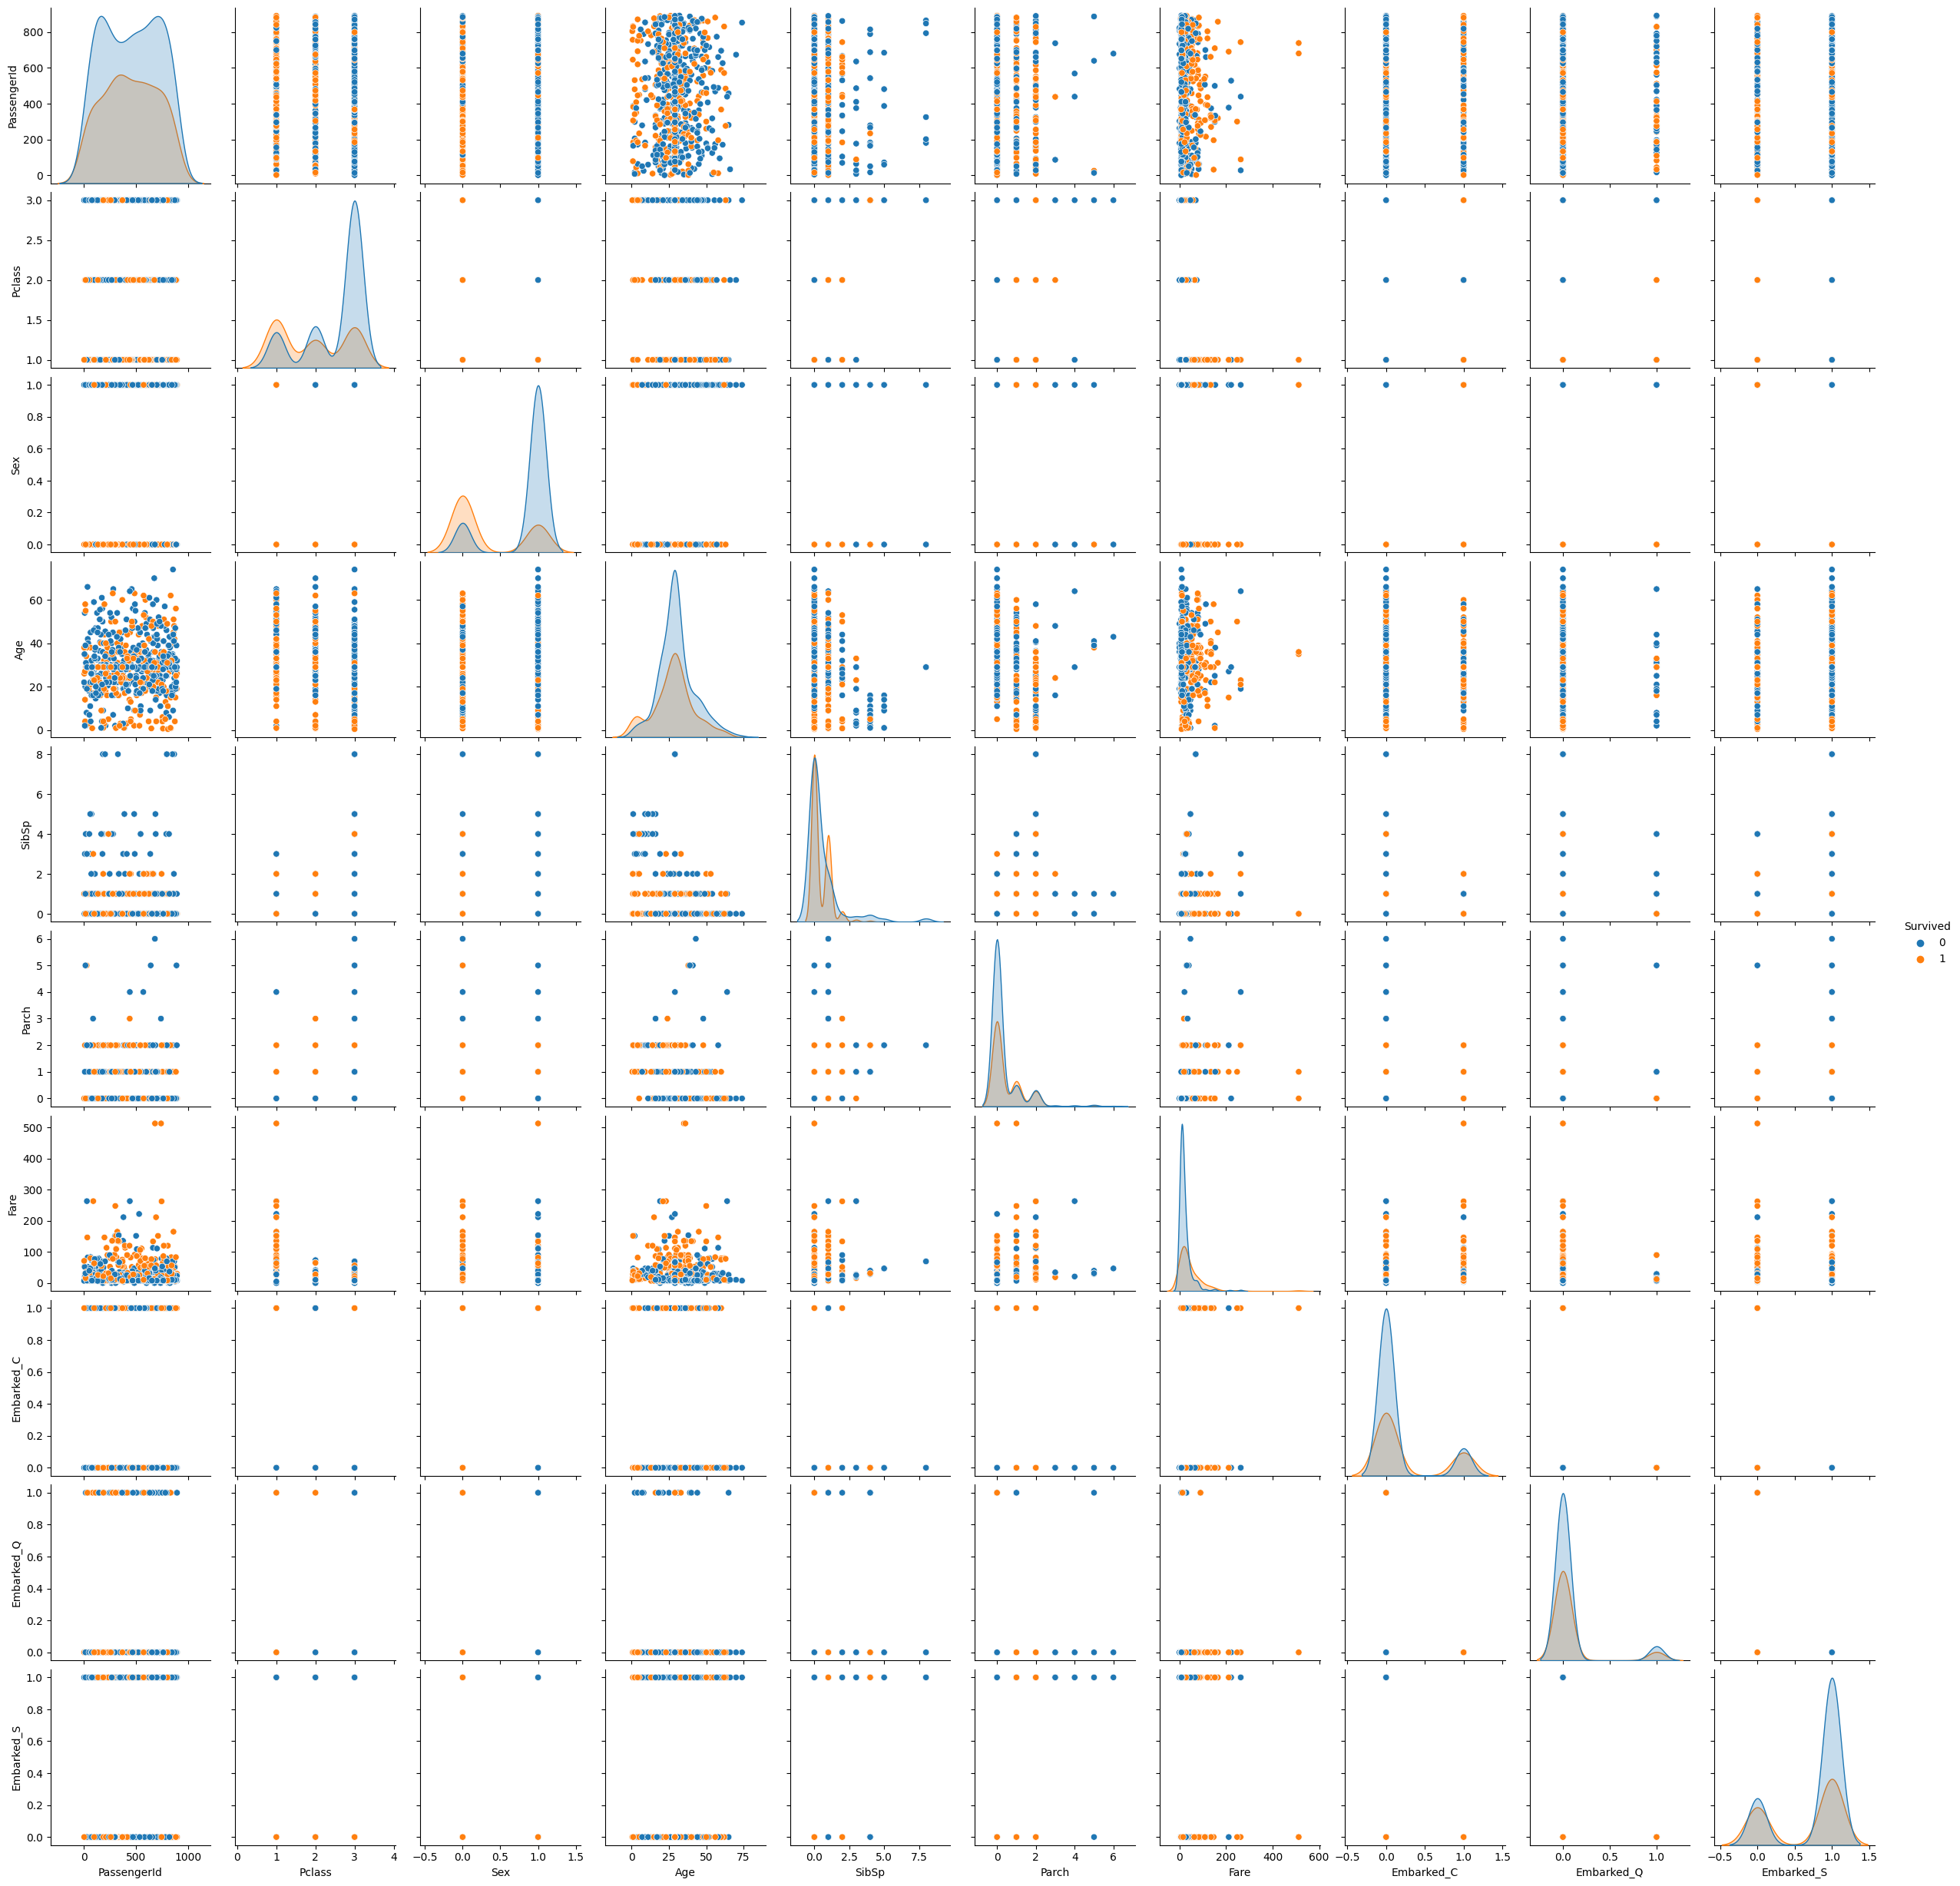

In [35]:
# Checking the pairplot

sns.pairplot(train_df, hue = "Survived")
plt.show()

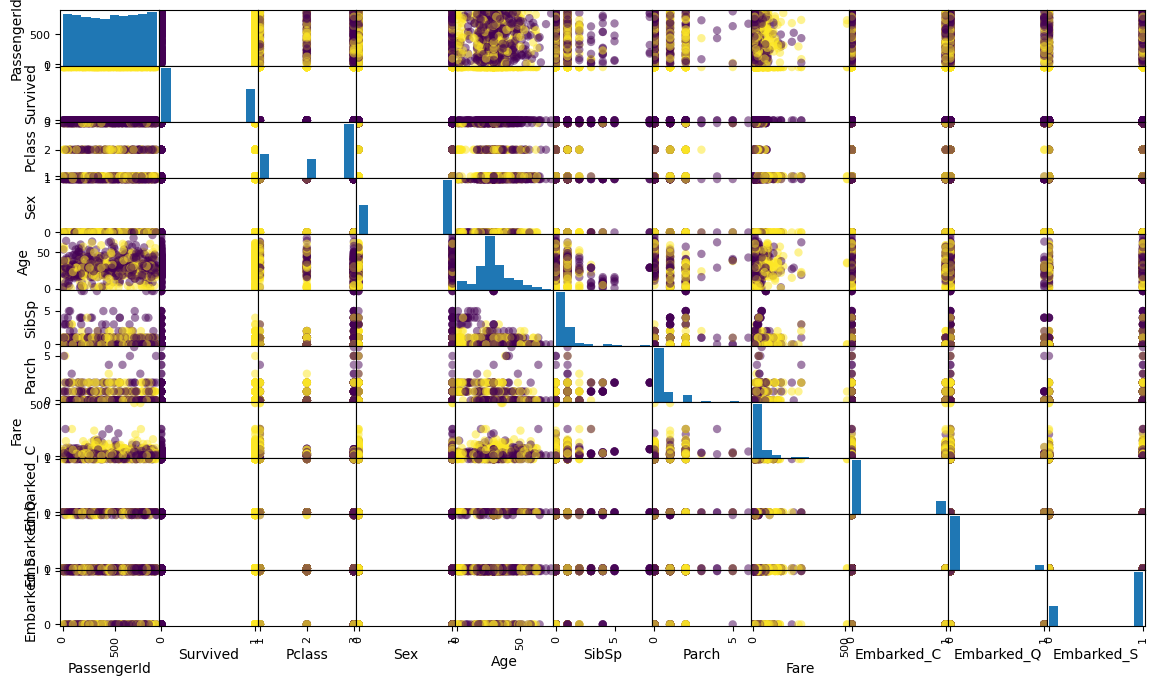

In [36]:
# Using scater-matrix plot

scatter_matrix(train_df, diagonal = "hist", marker = "o", c = train_df['Survived'], cmap = 'viridis', figsize = (14,8))
plt.show()

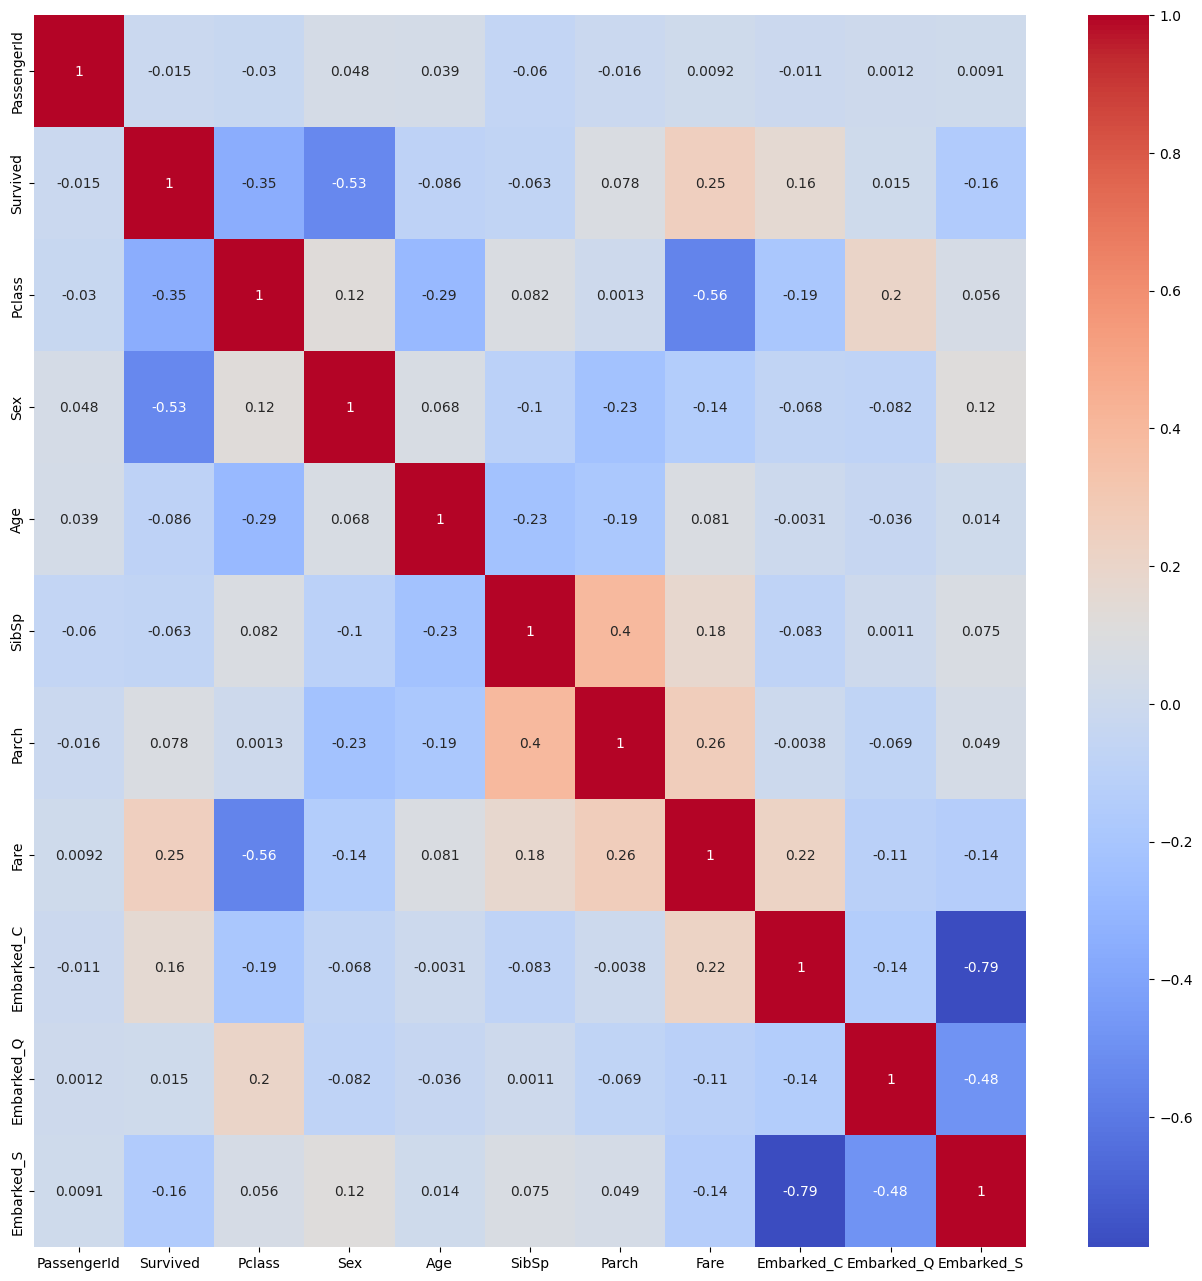

In [37]:
# Checking the heat map

plt.figure(figsize = (16,16))
sns.heatmap(train_df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

#### From the above explorations we can coclude the following 
1. We can conclude that the passenger id is insignificant as the correlation is very small, so it can be dropped.
2. We can also see that Age is also insignificant as the corellation is very low also.

In [38]:
# Removing the passenger id column before building any model

train_df = train_df.drop(['PassengerId'], axis = 1)
validation_df = validation_df.drop(['PassengerId'], axis = 1)

train_df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
806,0,1,1,39.0,0,0,0.0,0,0,1
747,1,2,0,30.0,0,0,13.0,0,0,1


In [39]:
validation_df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
391,1,3,1,21.0,0,0,7.7958,0,0,1
584,0,3,1,29.0,0,0,8.7125,1,0,0


#### Model Building and furthur preprocessing

In [40]:
# Splitting dependent and independent variable

raw_x_train = train_df.drop(['Survived'], axis = 1)
raw_y_train = train_df['Survived']

raw_x_val = validation_df.drop(['Survived'], axis = 1)
raw_y_val = validation_df['Survived']

raw_x_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
806,1,1,39.0,0,0,0.0,0,0,1
747,2,0,30.0,0,0,13.0,0,0,1


In [41]:
# Building the models on raw data and checking the accuracy

# Logistic Regression model
logit_raw = LogisticRegression()
logit_raw.fit(raw_x_train, raw_y_train)
lr_raw_y_pred_train = logit_raw.predict(raw_x_train)
lr_raw_y_pred_val = logit_raw.predict(raw_x_val)

print("Accuracy Score (Logistic Regression - Raw data)")
logit_train_raw_accuracy = accuracy_score(raw_y_train, lr_raw_y_pred_train)
logit_test_raw_accuracy = accuracy_score(raw_y_val, lr_raw_y_pred_val)
print("Training accuracy :", logit_train_raw_accuracy)
print("**************")
print("Test accuracy :", logit_test_raw_accuracy)
print("**************"*7)

# Ridge Classification (L2 Regularisation)
ridge_raw = RidgeClassifier(alpha = 1.0)
ridge_raw.fit(raw_x_train, raw_y_train)
ridge_raw_y_pred_train = ridge_raw.predict(raw_x_train)
ridge_raw_y_pred_val = ridge_raw.predict(raw_x_val)

print("Accuracy Score (Ridge  Classification model - Raw data)")
ridge_train_raw_accuracy = accuracy_score(raw_y_train, ridge_raw_y_pred_train)
ridge_test_raw_accuarcy = accuracy_score(raw_y_val, ridge_raw_y_pred_val)
print("Training accuracy :", ridge_train_raw_accuracy)
print("**************")
print("Test accuracy :", ridge_test_raw_accuarcy)
print("**************"*7)

# Decission Tree classifier with Gini Impurity - Max depth chosen after testing different values
dtree_gini_raw = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
dtree_gini_raw.fit(raw_x_train, raw_y_train)
dtg_raw_y_pred_train = dtree_gini_raw.predict(raw_x_train)
dtg_raw_y_pred_val = dtree_gini_raw.predict(raw_x_val)

print("Accuracy Score (Decission Tree (Gini Impurity) - Raw data)")
dtg_train_raw_accuracy = accuracy_score(raw_y_train, dtg_raw_y_pred_train)
dtg_test_raw_accuracy = accuracy_score(raw_y_val, dtg_raw_y_pred_val)
print("Training accuracy :", dtg_train_raw_accuracy)
print("**************")
print("Test accuracy :", dtg_test_raw_accuracy)
print("**************"*7)

# Decission Tree classifier with Information Gain - Max depth chosen after testing different values
dtree_gain_raw = DecisionTreeClassifier(criterion = 'entropy', max_depth = 9)
dtree_gain_raw.fit(raw_x_train, raw_y_train)
dtga_raw_y_pred_train = dtree_gain_raw.predict(raw_x_train)
dtga_raw_y_pred_val = dtree_gain_raw.predict(raw_x_val)

print("Accuracy Score (Decission Tree (Information Gain) - Raw data)")
dtga_train_raw_accuracy = accuracy_score(raw_y_train, dtga_raw_y_pred_train)
dtga_test_raw_accuracy = accuracy_score(raw_y_val, dtga_raw_y_pred_val)
print("Training accuracy :", dtga_train_raw_accuracy)
print("**************")
print("Test accuracy :", dtga_test_raw_accuracy)
print("**************"*7)

# Bagging Classifier 
bagging_raw = BaggingClassifier(dtree_gain_raw, max_samples = 100, max_features = 9)
bagging_raw.fit(raw_x_train, raw_y_train)
bagging_raw_y_pred_train = bagging_raw.predict(raw_x_train)
bagging_raw_y_pred_val = bagging_raw.predict(raw_x_val)

print("Accuracy Score (Bagging CLassifier - Raw data)")
bagging_train_raw_accuracy = accuracy_score(raw_y_train, bagging_raw_y_pred_train)
bagging_test_raw_accuracy = accuracy_score(raw_y_val, bagging_raw_y_pred_val)
print("Training accuracy :", bagging_train_raw_accuracy)
print("**************")
print("Test accuracy :", bagging_test_raw_accuracy)
print("**************"*7)

# Building the Random Forest Model with Information Gain - Parameters chosen after testing various values
rf_gain_raw = RandomForestClassifier(criterion = 'entropy', max_depth = 3, max_features = 7, n_estimators = 600, oob_score = True)
rf_gain_raw.fit(raw_x_train, raw_y_train)
rfga_raw_y_pred_train = rf_gain_raw.predict(raw_x_train)
rfga_raw_y_pred_val = rf_gain_raw.predict(raw_x_val)

print("Accuracy Score (Random Forest CLassifier (Information Gain) - Raw data)")
rfga_train_raw_accuracy = accuracy_score(raw_y_train, rfga_raw_y_pred_train)
rfga_test_raw_accuracy = accuracy_score(raw_y_val, rfga_raw_y_pred_val)
print("Training accuracy :", rfga_train_raw_accuracy)
print("**************")
print("Test accuracy :", rfga_test_raw_accuracy)
print("**************"*7)
 
# Building the Random Forest Model with Gini Impurity - Parameters chosen after testing various values
rf_gini_raw = RandomForestClassifier(criterion = 'entropy', max_depth = 5, max_features = 7, n_estimators = 600, oob_score = True)
rf_gini_raw.fit(raw_x_train, raw_y_train)
rfg_raw_y_pred_train = rf_gini_raw.predict(raw_x_train)
rfg_raw_y_pred_val = rf_gini_raw.predict(raw_x_val)

print("Accuracy Score (Random Forest CLassifier (Gini Impurity) - Raw data)")
rfg_train_raw_accuracy = accuracy_score(raw_y_train, rfg_raw_y_pred_train)
rfg_test_raw_accuracy = accuracy_score(raw_y_val, rfg_raw_y_pred_val)
print("Training accuracy :", rfg_train_raw_accuracy)
print("**************")
print("Test accuracy :", rfg_test_raw_accuracy)
print("**************"*7)

# Building the Boosting Classifier models
# Building AdaBoost model
adbst_raw = AdaBoostClassifier()
adbst_raw.fit(raw_x_train, raw_y_train)
adbst_raw_y_pred_train = adbst_raw.predict(raw_x_train)
adbst_raw_y_pred_val = adbst_raw.predict(raw_x_val)

print("Accuracy Score (AdaBoost CLassifier - Raw data)")
adbst_train_raw_accuracy = accuracy_score(raw_y_train, adbst_raw_y_pred_train)
adbst_test_raw_accuracy = accuracy_score(raw_y_val, adbst_raw_y_pred_val)
print("Training accuracy :", adbst_train_raw_accuracy)
print("**************")
print("Test accuracy :", adbst_test_raw_accuracy)
print("**************"*7)

# Building Gradient Boosting model
gdbst_raw = GradientBoostingClassifier()
gdbst_raw.fit(raw_x_train, raw_y_train)
gdbst_raw_y_pred_train = gdbst_raw.predict(raw_x_train)
gdbst_raw_y_pred_val = gdbst_raw.predict(raw_x_val)

print("Accuracy Score (Gradient Boost CLassifier - Raw data)")
gdbst_train_raw_accuracy = accuracy_score(raw_y_train, gdbst_raw_y_pred_train)
gdbst_test_raw_accuracy = accuracy_score(raw_y_val, gdbst_raw_y_pred_val)
print("Training accuracy :", gdbst_train_raw_accuracy)
print("**************")
print("Test accuracy :", gdbst_test_raw_accuracy)
print("**************"*7)

# Building Xtra Gradient Boosting model
xgdbst_raw = XGBClassifier()
xgdbst_raw.fit(raw_x_train, raw_y_train)
xgdbst_raw_y_pred_train = xgdbst_raw.predict(raw_x_train)
xgdbst_raw_y_pred_val = xgdbst_raw.predict(raw_x_val)

print("Accuracy Score (XGBoost CLassifier - Raw data)")
xgdbst_train_raw_accuracy = accuracy_score(raw_y_train, xgdbst_raw_y_pred_train)
xgdbst_test_raw_accuracy = accuracy_score(raw_y_val, xgdbst_raw_y_pred_val)
print("Training accuracy :", xgdbst_train_raw_accuracy)
print("**************")
print("Test accuracy :", xgdbst_test_raw_accuracy)
print("**************"*7)

# Building the SVM Classifier models for different kernels
# Building SVM model - with linear kernel
svm_linear_raw = SVC(kernel = 'linear')
svm_linear_raw.fit(raw_x_train, raw_y_train)
svml_raw_y_pred_train = svm_linear_raw.predict(raw_x_train)
svml_raw_y_pred_val = svm_linear_raw.predict(raw_x_val)

print("Accuracy Score (SVM Classifier (linear kernel) - Raw data)")
svml_train_raw_accuracy = accuracy_score(raw_y_train, svml_raw_y_pred_train)
svml_test_raw_accuracy = accuracy_score(raw_y_val, svml_raw_y_pred_val)
print("Training accuracy :", svml_train_raw_accuracy)
print("**************")
print("Test accuracy :", svml_test_raw_accuracy)
print("**************"*7)

# Building SVM model - with sigmoid kernel
svm_sigmoid_raw = SVC(kernel = 'sigmoid')
svm_sigmoid_raw.fit(raw_x_train, raw_y_train)
svmg_raw_y_pred_train = svm_sigmoid_raw.predict(raw_x_train)
svmg_raw_y_pred_val = svm_sigmoid_raw.predict(raw_x_val)

print("Accuracy Score (SVM Classifier (sigmoid kernel) - Raw data)")
svmg_train_raw_accuracy = accuracy_score(raw_y_train, svmg_raw_y_pred_train)
svmg_test_raw_accuracy = accuracy_score(raw_y_val, svmg_raw_y_pred_val)
print("Training accuracy :", svmg_train_raw_accuracy)
print("**************")
print("Test accuracy :", svmg_test_raw_accuracy)
print("**************"*7)

# Building SVM model - with poly kernel
svm_poly_raw = SVC(kernel = 'poly')
svm_poly_raw.fit(raw_x_train, raw_y_train)
svmp_raw_y_pred_train = svm_poly_raw.predict(raw_x_train)
svmp_raw_y_pred_val = svm_poly_raw.predict(raw_x_val)

print("Accuracy Score (SVM Classifier (poly kernel) - Raw data)")
svmp_train_raw_accuracy = accuracy_score(raw_y_train, svmp_raw_y_pred_train)
svmp_test_raw_accuracy = accuracy_score(raw_y_val, svmp_raw_y_pred_val)
print("Training accuracy :", svmp_train_raw_accuracy)
print("**************")
print("Test accuracy :", svmp_test_raw_accuracy)
print("**************"*7)

# Building SVM model - with RBF kernel
svm_rbf_raw = SVC(kernel = 'rbf')
svm_rbf_raw.fit(raw_x_train, raw_y_train)
svmr_raw_y_pred_train = svm_rbf_raw.predict(raw_x_train)
svmr_raw_y_pred_val = svm_rbf_raw.predict(raw_x_val)

print("Accuracy Score (SVM Classifier (RBF kernel) - Raw data)")
svmr_train_raw_accuracy = accuracy_score(raw_y_train, svmr_raw_y_pred_train)
svmr_test_raw_accuracy = accuracy_score(raw_y_val, svmr_raw_y_pred_val)
print("Training accuracy :", svmr_train_raw_accuracy)
print("**************")
print("Test accuracy :", svmr_test_raw_accuracy)
print("**************"*7)

Accuracy Score (Logistic Regression - Raw data)
Training accuracy : 0.8098802395209581
**************
Test accuracy : 0.7802690582959642
**************************************************************************************************
Accuracy Score (Ridge  Classification model - Raw data)
Training accuracy : 0.8053892215568862
**************
Test accuracy : 0.7892376681614349
**************************************************************************************************
Accuracy Score (Decission Tree (Gini Impurity) - Raw data)
Training accuracy : 0.8293413173652695
**************
Test accuracy : 0.8071748878923767
**************************************************************************************************
Accuracy Score (Decission Tree (Information Gain) - Raw data)
Training accuracy : 0.9146706586826348
**************
Test accuracy : 0.8295964125560538
**************************************************************************************************
Accuracy Score (Bagging

In [42]:
# Function to find the best value of K based on mean squared error

def find_k(x_train, y_train, x_test, y_test):
    error_rate = []    # Finding the error rate for 50 iterations

    for i in range(1, 50):
        knn = KNeighborsClassifier(n_neighbors = i)    # Building the model with i neighbors
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    
# Ploting the error values to find the best value of k
    
    plt.figure(figsize = (8, 8))
    plt.plot(range(1,50), error_rate, color = 'red', linestyle = 'dashed', marker = 'o', markersize = 10, markerfacecolor = 'blue')
    plt.title("Error vs K-Value")
    plt.xlabel("K-Value")
    plt.ylabel("Error")
    plt.show()

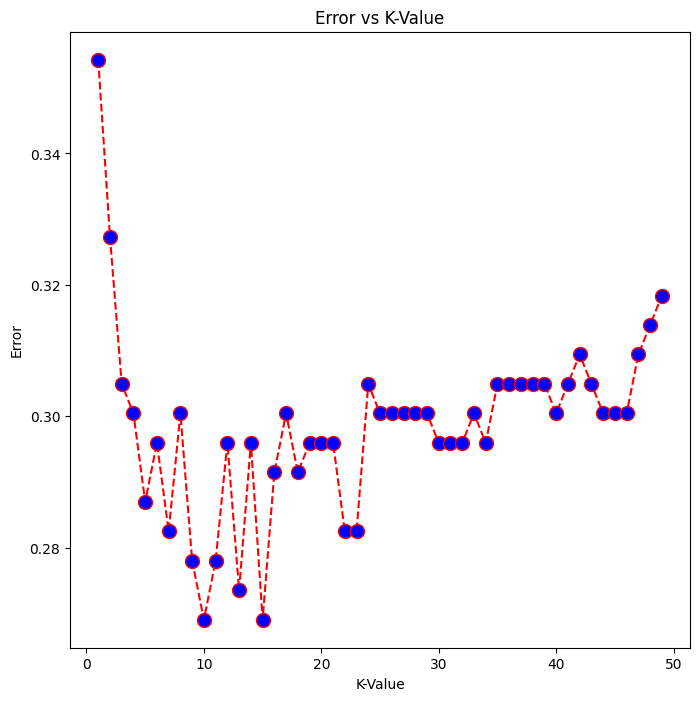

In [43]:
find_k(raw_x_train, raw_y_train, raw_x_val, raw_y_val)

- Error rate is minimum at k = 10, procrrding with k = 10

In [44]:
# Building KNN model
knn_raw = KNeighborsClassifier(n_neighbors = 10)
knn_raw.fit(raw_x_train, raw_y_train)
knn_raw_y_pred_train = knn_raw.predict(raw_x_train)
knn_raw_y_pred_val = knn_raw.predict(raw_x_val)

print("Accuracy Score (KNN Classifier (k = 10) - Raw data)")
knn_train_raw_accuracy = accuracy_score(raw_y_train, knn_raw_y_pred_train)
knn_test_raw_accuracy = accuracy_score(raw_y_val, knn_raw_y_pred_val)
print("Training accuracy :", knn_train_raw_accuracy)
print("**************")
print("Test accuracy :", knn_test_raw_accuracy)
print("**************"*7)

Accuracy Score (KNN Classifier (k = 10) - Raw data)
Training accuracy : 0.7514970059880239
**************
Test accuracy : 0.7309417040358744
**************************************************************************************************


In [45]:
# Function for checking the best model out of the tested models for correlation treated dataset

def check_scores(train_accuracy_list, test_accuracy_list, data):
    models_list = ['Logistic Regression', 'Ridge Classification', "Decission Tree Classification - Gini Impurity", 
                   "Decission Tree Classification - Information Gain", "Bagging Classifier", 'Random Forest Classification - Gini Impurity', 
                   'Random Forest Classification - Information Gain', "Adaboost Classification", 'Gradient Boosting Classification', 
                   'XGBoost Classification', 'K Nearest Neighbour', 'SVR - Linear', 'SVR - Polynomial', 'SVR - Sigmoid', 
                   'SVR - RBF']

    accuracy = pd.DataFrame({'Method' : models_list, 'Accuracy Score(Training)' : train_accuracy_list, 
                             'Accuracy Score(Testing)' : test_accuracy_list})

    sns.lineplot(x = 'Method', y = 'Accuracy Score(Training)', data = accuracy, label = 'Train Accuracy', color = 'blue', linestyle = 'dashed', marker = 'o', markersize = 5, markerfacecolor = 'blue')
    sns.lineplot(x = 'Method', y = 'Accuracy Score(Testing)', data = accuracy, label = 'Test Accuracy', color = 'green', linestyle = 'dashed', marker = 'o', markersize = 5, markerfacecolor = 'green')
    plt.xticks(rotation = 90)
    plt.title("Accuracy on %s dataset" % data)
    plt.ylim(0.0, 1.0)
    plt.axhline(y = 0.7, linewidth = 1, color = 'red')
    plt.show()

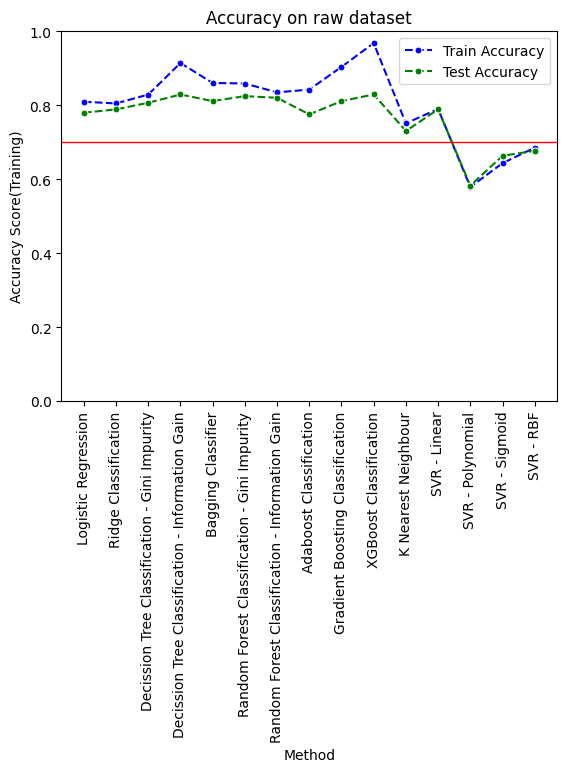

In [46]:
raw_train_accuracy_list = [logit_train_raw_accuracy, ridge_train_raw_accuracy, dtg_train_raw_accuracy, 
                           dtga_train_raw_accuracy, bagging_train_raw_accuracy, rfg_train_raw_accuracy, 
                           rfga_train_raw_accuracy, adbst_train_raw_accuracy, gdbst_train_raw_accuracy, 
                           xgdbst_train_raw_accuracy, knn_train_raw_accuracy, svml_train_raw_accuracy, 
                           svmg_train_raw_accuracy, svmp_train_raw_accuracy, svmr_train_raw_accuracy]

raw_test_accuracy_list = [logit_test_raw_accuracy, ridge_test_raw_accuarcy, dtg_test_raw_accuracy, 
                          dtga_test_raw_accuracy, bagging_test_raw_accuracy, rfg_test_raw_accuracy, 
                          rfga_test_raw_accuracy, adbst_test_raw_accuracy, gdbst_test_raw_accuracy, 
                          xgdbst_test_raw_accuracy, knn_test_raw_accuracy, svml_test_raw_accuracy, 
                          svmg_test_raw_accuracy, svmp_test_raw_accuracy, svmr_test_raw_accuracy]

check_scores(raw_train_accuracy_list, raw_test_accuracy_list, 'raw')

In [47]:
# def check_scores_bar(train_accuracy_list, test_accuracy_list, data):
#     models_list = ['Logistic Regression', 'Ridge Classification', "Decision Tree Classification - Gini Impurity", 
#                    "Decision Tree Classification - Information Gain", "Bagging Classifier", 'Random Forest Classification - Gini Impurity', 
#                    'Random Forest Classification - Information Gain', "Adaboost Classification", 'Gradient Boosting Classification', 
#                    'XGBoost Classification', 'K Nearest Neighbour', 'SVR - Linear', 'SVR - Polynomial', 'SVR - Sigmoid', 
#                    'SVR - RBF']

#     accuracy = pd.DataFrame({'Method': models_list, 'Accuracy Score(Training)': train_accuracy_list, 
#                              'Accuracy Score(Testing)': test_accuracy_list})

#     plt.figure(figsize=(12, 6))
#     sns.barplot(x='Method', y='Accuracy Score(Training)', data=accuracy, color= 'blue', label='Train Accuracy')
#     sns.barplot(x='Method', y='Accuracy Score(Testing)', data=accuracy, label='Test Accuracy')
#     plt.xticks(rotation=45, ha='right')
#     plt.title("Accuracy on %s dataset" % data)
#     plt.ylim(0.0, 1.0)
#     plt.axhline(y=0.7, linewidth=1, color='red', linestyle='--')
#     plt.legend()
#     plt.show()

In [48]:
# check_scores_bar(raw_train_accuracy_list, raw_test_accuracy_list, 'raw')

In [49]:
# def check_scores_both(train_accuracy_list, test_accuracy_list, data):
#     models_list = ['Logistic Regression', 'Ridge Classification', "Decision Tree Classification - Gini Impurity", 
#                    "Decision Tree Classification - Information Gain", "Bagging Classifier", 'Random Forest Classification - Gini Impurity', 
#                    'Random Forest Classification - Information Gain', "Adaboost Classification", 'Gradient Boosting Classification', 
#                    'XGBoost Classification', 'K Nearest Neighbour', 'SVR - Linear', 'SVR - Polynomial', 'SVR - Sigmoid', 
#                    'SVR - RBF']

#     accuracy = pd.DataFrame({'Method': models_list, 'Accuracy Score(Training)': train_accuracy_list, 
#                              'Accuracy Score(Testing)': test_accuracy_list})

#     plt.figure(figsize=(12, 6))
#     sns.barplot(x='Method', y='Accuracy Score(Training)', data=accuracy, color= 'blue', label='Train Accuracy')
#     sns.barplot(x='Method', y='Accuracy Score(Testing)', data=accuracy, color= 'skyblue', label='Test Accuracy')
#     sns.lineplot(x = 'Method', y = 'Accuracy Score(Training)', data = accuracy, label = 'Train Accuracy', color = 'brown', linestyle = 'dashed', marker = 'o', markersize = 5, markerfacecolor = 'brown')
#     sns.lineplot(x = 'Method', y = 'Accuracy Score(Testing)', data = accuracy, label = 'Test Accuracy', color = 'green', linestyle = 'dashed', marker = 'o', markersize = 5, markerfacecolor = 'green')
#     plt.xticks(rotation=45, ha='right')
#     plt.title("Accuracy on %s dataset" % data)
#     plt.ylim(0.0, 1.0)
#     plt.axhline(y=0.7, linewidth=1, color='red', linestyle='--')
#     plt.legend()
#     plt.show()

In [50]:
# check_scores_both(raw_train_accuracy_list, raw_test_accuracy_list, 'raw')

- Decision Tree with Information Gain criterion and XGBoost classifier achieved the highest training and testing accuracies, indicating robust performance on the raw data, 82.9%
- Random Forest models, both with Gini Impurity and Information Gain, demonstrated strong performance with high training of more than 90% and testing accuracies of arround 82%.
- The SVM classifier with a linear kernel and Ridge Classifier exhibited good but slightly lower performance compared to the top-performing models, with accuracies around 78-79%.
- AdaBoost and Gradient Boosting classifiers achieved competitive results, with testing accuracies above 77%, indicating effective ensemble learning.
- SVM classifiers with non-linear kernels (sigmoid, poly, RBF) showed varying performance, with the poly kernel performing the best among them on the testing set, but all under 70%.
- Scalling the data to see if accuracy can be improved

In [51]:
# Using satandardisation technique

ssc = StandardScaler()
scaled_x_train = pd.DataFrame(ssc.fit_transform(raw_x_train))
scaled_y_train = raw_y_train
scaled_x_val = pd.DataFrame(ssc.fit_transform(raw_x_val))
scaled_y_val = raw_y_val

scaled_x_train.head(2)

,0,1,2,3,4,5,6,7,8
0,-1.551302,0.734282,0.76797,-0.468528,-0.48479,-0.679049,-0.484511,-0.29656,0.614263
1,-0.364281,-1.361874,0.05382,-0.468528,-0.48479,-0.399987,-0.484511,-0.29656,0.614263


In [52]:
scaled_x_val.head(2)

,0,1,2,3,4,5,6,7,8
0,0.84211,0.747958,-0.658168,-0.499196,-0.44032,-0.451194,-0.474631,-0.339116,0.634441
1,0.84211,0.747958,-0.090455,-0.499196,-0.44032,-0.435358,2.106899,-0.339116,-1.576190


In [53]:
# Building the models on scalled data and checking the accuracy

# Logistic Regression model
logit_scaled = LogisticRegression()
logit_scaled.fit(scaled_x_train, scaled_y_train)
lr_scaled_y_pred_train = logit_scaled.predict(scaled_x_train)
lr_scaled_y_pred_val = logit_scaled.predict(scaled_x_val)

print("Accuracy Score (Logistic Regression - scaled data)")
logit_train_scaled_accuracy = accuracy_score(scaled_y_train, lr_scaled_y_pred_train)
logit_test_scaled_accuracy = accuracy_score(scaled_y_val, lr_scaled_y_pred_val)
print("Training accuracy :", logit_train_scaled_accuracy)
print("**************")
print("Test accuracy :", logit_test_scaled_accuracy)
print("**************"*7)

# Ridge Classification (L2 Regularisation)
ridge_scaled = RidgeClassifier(alpha = 1.0)
ridge_scaled.fit(scaled_x_train, scaled_y_train)
ridge_scaled_y_pred_train = ridge_scaled.predict(scaled_x_train)
ridge_scaled_y_pred_val = ridge_scaled.predict(scaled_x_val)

print("Accuracy Score (Ridge  Classification model - scaled data)")
ridge_train_scaled_accuracy = accuracy_score(scaled_y_train, ridge_scaled_y_pred_train)
ridge_test_scaled_accuarcy = accuracy_score(scaled_y_val, ridge_scaled_y_pred_val)
print("Training accuracy :", ridge_train_scaled_accuracy)
print("**************")
print("Test accuracy :", ridge_test_scaled_accuarcy)
print("**************"*7)

# Decission Tree classifier with Gini Impurity - Max depth chosen after testing different values
dtree_gini_scaled = DecisionTreeClassifier(criterion = 'gini', max_depth = 5)
dtree_gini_scaled.fit(scaled_x_train, scaled_y_train)
dtg_scaled_y_pred_train = dtree_gini_scaled.predict(scaled_x_train)
dtg_scaled_y_pred_val = dtree_gini_scaled.predict(scaled_x_val)

print("Accuracy Score (Decission Tree (Gini Impurity) - scaled data)")
dtg_train_scaled_accuracy = accuracy_score(scaled_y_train, dtg_scaled_y_pred_train)
dtg_test_scaled_accuracy = accuracy_score(scaled_y_val, dtg_scaled_y_pred_val)
print("Training accuracy :", dtg_train_scaled_accuracy)
print("**************")
print("Test accuracy :", dtg_test_scaled_accuracy)
print("**************"*7)

# Decission Tree classifier with Information Gain - Max depth chosen after testing different values
dtree_gain_scaled = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
dtree_gain_scaled.fit(scaled_x_train, scaled_y_train)
dtga_scaled_y_pred_train = dtree_gain_scaled.predict(scaled_x_train)
dtga_scaled_y_pred_val = dtree_gain_scaled.predict(scaled_x_val)

print("Accuracy Score (Decission Tree (Information Gain) - scaled data)")
dtga_train_scaled_accuracy = accuracy_score(scaled_y_train, dtga_scaled_y_pred_train)
dtga_test_scaled_accuracy = accuracy_score(scaled_y_val, dtga_scaled_y_pred_val)
print("Training accuracy :", dtga_train_scaled_accuracy)
print("**************")
print("Test accuracy :", dtga_test_scaled_accuracy)
print("**************"*7)

# Bagging Classifier 
bagging_scaled = BaggingClassifier(max_samples = 100, max_features = 9)
bagging_scaled.fit(scaled_x_train, scaled_y_train)
bagging_scaled_y_pred_train = bagging_scaled.predict(scaled_x_train)
bagging_scaled_y_pred_val = bagging_scaled.predict(scaled_x_val)

print("Accuracy Score (Bagging CLassifier - scaled data)")
bagging_train_scaled_accuracy = accuracy_score(scaled_y_train, bagging_scaled_y_pred_train)
bagging_test_scaled_accuracy = accuracy_score(scaled_y_val, bagging_scaled_y_pred_val)
print("Training accuracy :", bagging_train_scaled_accuracy)
print("**************")
print("Test accuracy :", bagging_test_scaled_accuracy)
print("**************"*7)

# Building the Random Forest Model with Information Gain - Parameters chosen after testing various values
rf_gain_scaled = RandomForestClassifier(criterion = 'entropy', max_depth = 3, max_features = 7, n_estimators = 600, oob_score = True)
rf_gain_scaled.fit(scaled_x_train, scaled_y_train)
rfga_scaled_y_pred_train = rf_gain_scaled.predict(scaled_x_train)
rfga_scaled_y_pred_val = rf_gain_scaled.predict(scaled_x_val)

print("Accuracy Score (Random Forest CLassifier (Information Gain) - scaled data)")
rfga_train_scaled_accuracy = accuracy_score(scaled_y_train, rfga_scaled_y_pred_train)
rfga_test_scaled_accuracy = accuracy_score(scaled_y_val, rfga_scaled_y_pred_val)
print("Training accuracy :", rfga_train_scaled_accuracy)
print("**************")
print("Test accuracy :", rfga_test_scaled_accuracy)
print("**************"*7)
 
# Building the Random Forest Model with Gini Impurity - Parameters chosen after testing various values
rf_gini_scaled = RandomForestClassifier(criterion = 'entropy', max_depth = 5, max_features = 7, n_estimators = 600, oob_score = True)
rf_gini_scaled.fit(scaled_x_train, scaled_y_train)
rfg_scaled_y_pred_train = rf_gini_scaled.predict(scaled_x_train)
rfg_scaled_y_pred_val = rf_gini_scaled.predict(scaled_x_val)

print("Accuracy Score (Random Forest CLassifier (Gini Impurity) - scaled data)")
rfg_train_scaled_accuracy = accuracy_score(scaled_y_train, rfg_scaled_y_pred_train)
rfg_test_scaled_accuracy = accuracy_score(scaled_y_val, rfg_scaled_y_pred_val)
print("Training accuracy :", rfg_train_scaled_accuracy)
print("**************")
print("Test accuracy :", rfg_test_scaled_accuracy)
print("**************"*7)

# Building the Boosting Classifier models
# Building AdaBoost model
adbst_scaled = AdaBoostClassifier()
adbst_scaled.fit(scaled_x_train, scaled_y_train)
adbst_scaled_y_pred_train = adbst_scaled.predict(scaled_x_train)
adbst_scaled_y_pred_val = adbst_scaled.predict(scaled_x_val)

print("Accuracy Score (AdaBoost CLassifier - scaled data)")
adbst_train_scaled_accuracy = accuracy_score(scaled_y_train, adbst_scaled_y_pred_train)
adbst_test_scaled_accuracy = accuracy_score(scaled_y_val, adbst_scaled_y_pred_val)
print("Training accuracy :", adbst_train_scaled_accuracy)
print("**************")
print("Test accuracy :", adbst_test_scaled_accuracy)
print("**************"*7)

# Building Gradient Boosting model
gdbst_scaled = GradientBoostingClassifier()
gdbst_scaled.fit(scaled_x_train, scaled_y_train)
gdbst_scaled_y_pred_train = gdbst_scaled.predict(scaled_x_train)
gdbst_scaled_y_pred_val = gdbst_scaled.predict(scaled_x_val)

print("Accuracy Score (Gradient Boost CLassifier - scaled data)")
gdbst_train_scaled_accuracy = accuracy_score(scaled_y_train, gdbst_scaled_y_pred_train)
gdbst_test_scaled_accuracy = accuracy_score(scaled_y_val, gdbst_scaled_y_pred_val)
print("Training accuracy :", gdbst_train_scaled_accuracy)
print("**************")
print("Test accuracy :", gdbst_test_scaled_accuracy)
print("**************"*7)

# Building Xtra Gradient Boosting model
xgdbst_scaled = XGBClassifier()
xgdbst_scaled.fit(scaled_x_train, scaled_y_train)
xgdbst_scaled_y_pred_train = xgdbst_scaled.predict(scaled_x_train)
xgdbst_scaled_y_pred_val = xgdbst_scaled.predict(scaled_x_val)

print("Accuracy Score (XGBoost CLassifier - scaled data)")
xgdbst_train_scaled_accuracy = accuracy_score(scaled_y_train, xgdbst_scaled_y_pred_train)
xgdbst_test_scaled_accuracy = accuracy_score(scaled_y_val, xgdbst_scaled_y_pred_val)
print("Training accuracy :", xgdbst_train_scaled_accuracy)
print("**************")
print("Test accuracy :", xgdbst_test_scaled_accuracy)
print("**************"*7)

# Building the SVM Classifier models for different kernels
# Building SVM model - with linear kernel
svm_linear_scaled = SVC(kernel = 'linear')
svm_linear_scaled.fit(scaled_x_train, scaled_y_train)
svml_scaled_y_pred_train = svm_linear_scaled.predict(scaled_x_train)
svml_scaled_y_pred_val = svm_linear_scaled.predict(scaled_x_val)

print("Accuracy Score (SVM Classifier (linear kernel) - scaled data)")
svml_train_scaled_accuracy = accuracy_score(scaled_y_train, svml_scaled_y_pred_train)
svml_test_scaled_accuracy = accuracy_score(scaled_y_val, svml_scaled_y_pred_val)
print("Training accuracy :", svml_train_scaled_accuracy)
print("**************")
print("Test accuracy :", svml_test_scaled_accuracy)
print("**************"*7)

# Building SVM model - with sigmoid kernel
svm_sigmoid_scaled = SVC(kernel = 'sigmoid')
svm_sigmoid_scaled.fit(scaled_x_train, scaled_y_train)
svmg_scaled_y_pred_train = svm_sigmoid_scaled.predict(scaled_x_train)
svmg_scaled_y_pred_val = svm_sigmoid_scaled.predict(scaled_x_val)

print("Accuracy Score (SVM Classifier (sigmoid kernel) - scaled data)")
svmg_train_scaled_accuracy = accuracy_score(scaled_y_train, svmg_scaled_y_pred_train)
svmg_test_scaled_accuracy = accuracy_score(scaled_y_val, svmg_scaled_y_pred_val)
print("Training accuracy :", svmg_train_scaled_accuracy)
print("**************")
print("Test accuracy :", svmg_test_scaled_accuracy)
print("**************"*7)

# Building SVM model - with poly kernel
svm_poly_scaled = SVC(kernel = 'poly')
svm_poly_scaled.fit(scaled_x_train, scaled_y_train)
svmp_scaled_y_pred_train = svm_poly_scaled.predict(scaled_x_train)
svmp_scaled_y_pred_val = svm_poly_scaled.predict(scaled_x_val)

print("Accuracy Score (SVM Classifier (poly kernel) - scaled data)")
svmp_train_scaled_accuracy = accuracy_score(scaled_y_train, svmp_scaled_y_pred_train)
svmp_test_scaled_accuracy = accuracy_score(scaled_y_val, svmp_scaled_y_pred_val)
print("Training accuracy :", svmp_train_scaled_accuracy)
print("**************")
print("Test accuracy :", svmp_test_scaled_accuracy)
print("**************"*7)

# Building SVM model - with RBF kernel
svm_rbf_scaled = SVC(kernel = 'rbf')
svm_rbf_scaled.fit(scaled_x_train, scaled_y_train)
svmr_scaled_y_pred_train = svm_rbf_scaled.predict(scaled_x_train)
svmr_scaled_y_pred_val = svm_rbf_scaled.predict(scaled_x_val)

print("Accuracy Score (SVM Classifier (RBF kernel) - scaled data)")
svmr_train_scaled_accuracy = accuracy_score(scaled_y_train, svmr_scaled_y_pred_train)
svmr_test_scaled_accuracy = accuracy_score(scaled_y_val, svmr_scaled_y_pred_val)
print("Training accuracy :", svmr_train_scaled_accuracy)
print("**************")
print("Test accuracy :", svmr_test_scaled_accuracy)
print("**************"*7)

Accuracy Score (Logistic Regression - scaled data)
Training accuracy : 0.8083832335329342
**************
Test accuracy : 0.7802690582959642
**************************************************************************************************
Accuracy Score (Ridge  Classification model - scaled data)
Training accuracy : 0.8053892215568862
**************
Test accuracy : 0.7982062780269058
**************************************************************************************************
Accuracy Score (Decission Tree (Gini Impurity) - scaled data)
Training accuracy : 0.8502994011976048
**************
Test accuracy : 0.7623318385650224
**************************************************************************************************
Accuracy Score (Decission Tree (Information Gain) - scaled data)
Training accuracy : 0.8592814371257484
**************
Test accuracy : 0.7847533632286996
**************************************************************************************************
Accuracy Sc

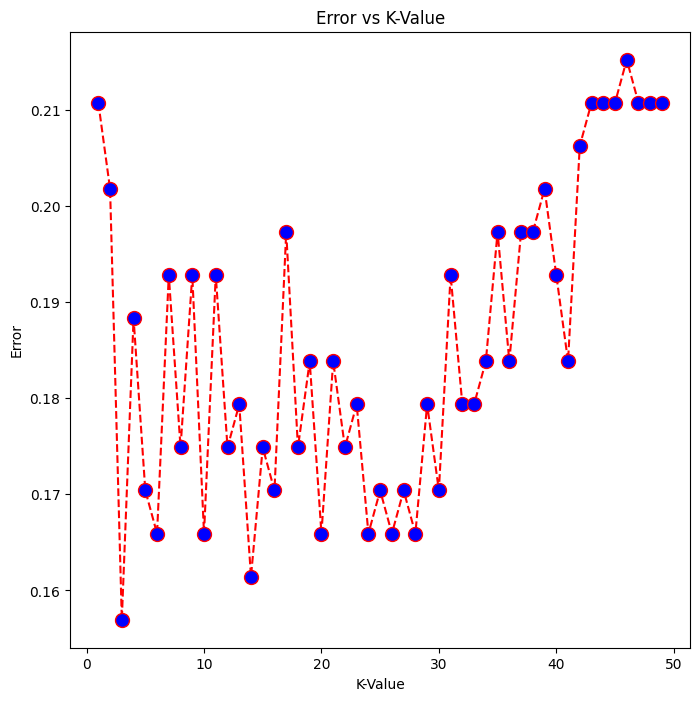

In [54]:
find_k(scaled_x_train, scaled_y_train, scaled_x_val, scaled_y_val)

- Error is leat at k = 2, we can aslo try k = 5 and k = 13 and confirm k depending on the performance
- Best performance at k = 5

In [55]:
# Building KNN model
knn_scaled = KNeighborsClassifier(n_neighbors = 5)
knn_scaled.fit(scaled_x_train, scaled_y_train)
knn_scaled_y_pred_train = knn_scaled.predict(scaled_x_train)
knn_scaled_y_pred_val = knn_scaled.predict(scaled_x_val)

print("Accuracy Score (KNN Classifier (k = 5) - scaled data)")
knn_train_scaled_accuracy = accuracy_score(scaled_y_train, knn_scaled_y_pred_train)
knn_test_scaled_accuracy = accuracy_score(scaled_y_val, knn_scaled_y_pred_val)
print("Training accuracy :", knn_train_scaled_accuracy)
print("**************")
print("Test accuracy :", knn_test_scaled_accuracy)
print("**************"*7)

Accuracy Score (KNN Classifier (k = 5) - scaled data)
Training accuracy : 0.8458083832335329
**************
Test accuracy : 0.8295964125560538
**************************************************************************************************


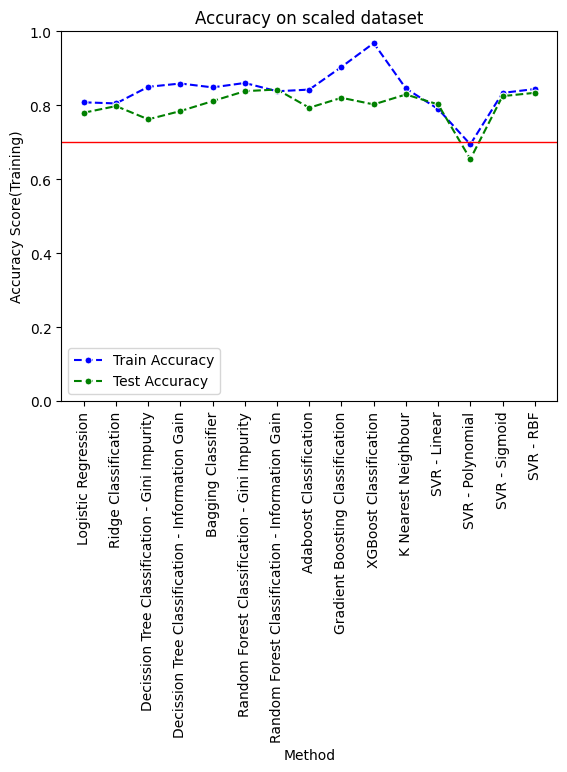

In [56]:
scaled_train_accuracy_list = [logit_train_scaled_accuracy, ridge_train_scaled_accuracy, dtg_train_scaled_accuracy, 
                           dtga_train_scaled_accuracy, bagging_train_scaled_accuracy, rfg_train_scaled_accuracy, 
                           rfga_train_scaled_accuracy, adbst_train_scaled_accuracy, gdbst_train_scaled_accuracy, 
                           xgdbst_train_scaled_accuracy, knn_train_scaled_accuracy, svml_train_scaled_accuracy, 
                           svmg_train_scaled_accuracy, svmp_train_scaled_accuracy, svmr_train_scaled_accuracy]

scaled_test_accuracy_list = [logit_test_scaled_accuracy, ridge_test_scaled_accuarcy, dtg_test_scaled_accuracy, 
                          dtga_test_scaled_accuracy, bagging_test_scaled_accuracy, rfg_test_scaled_accuracy, 
                          rfga_test_scaled_accuracy, adbst_test_scaled_accuracy, gdbst_test_scaled_accuracy, 
                          xgdbst_test_scaled_accuracy, knn_test_scaled_accuracy, svml_test_scaled_accuracy, 
                          svmg_test_scaled_accuracy, svmp_test_scaled_accuracy, svmr_test_scaled_accuracy]

check_scores(scaled_train_accuracy_list, scaled_test_accuracy_list, 'scaled')

- Random Forest models (both Gini Impurity and Information Gain) consistently demonstrate high training and testing accuracies, with Gini Impurity achieving the highest overall accuracy on the testing set (83.86%).
- Gradient Boosting and Decision Tree (Gini Impurity) models also perform well, with testing accuracies around 82% and 76%, respectively.
- The SVM classifier with an RBF kernel shows notable improvement on the scaled data, achieving a testing accuracy of 83.41%, compared to 67.71% on the raw data.
- The KNN classifier with k=5 performs better on scaled data, achieving a testing accuracy of 82.96%, compared to 73.09% on the raw data.
- Overall, the performance of most models remains consistent or slightly improves on scaled data. Logistic Regression, Ridge Classifier, and AdaBoost show similar performance on both raw and scaled data.

##### Doing outlier treatment

In [57]:
# Checking if we can improve the accuracy after outlier treatment

olt_x_train = raw_x_train
olt_y_train = train_df['Survived']

olt_x_val = raw_x_val
olt_y_val = validation_df['Survived']

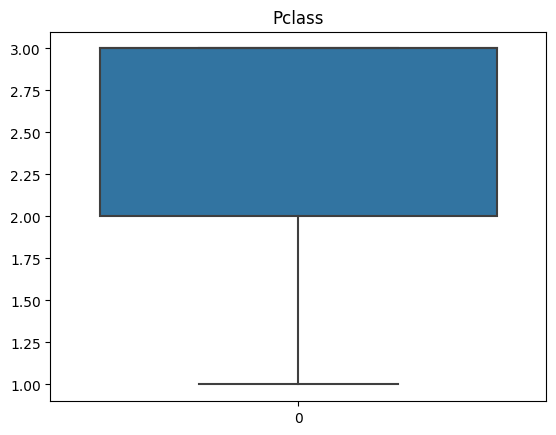

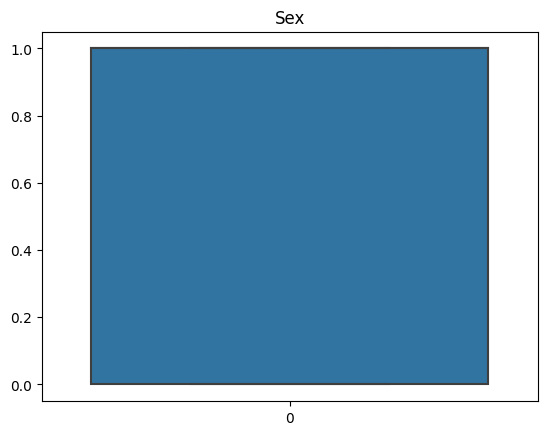

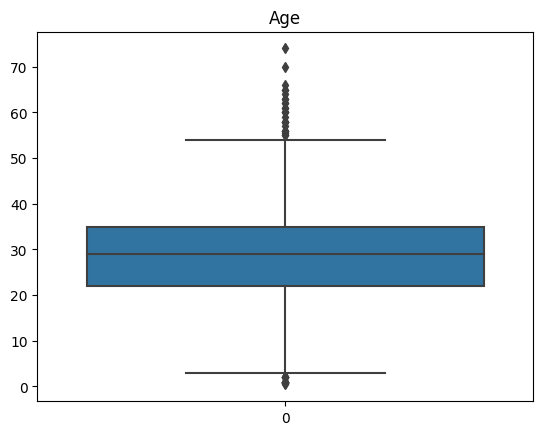

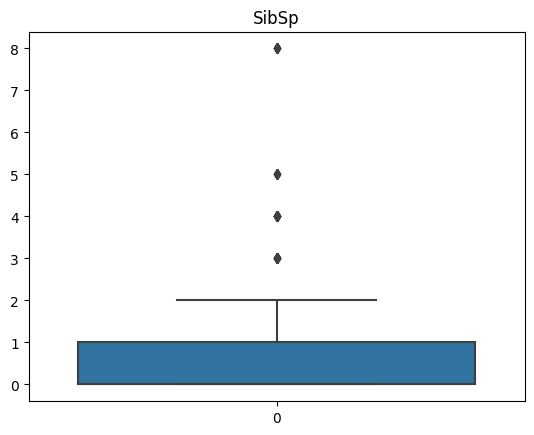

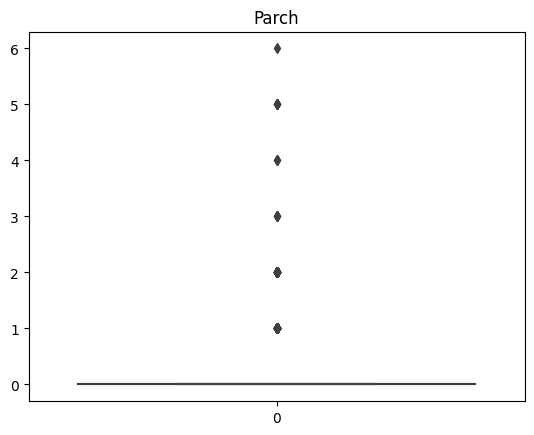

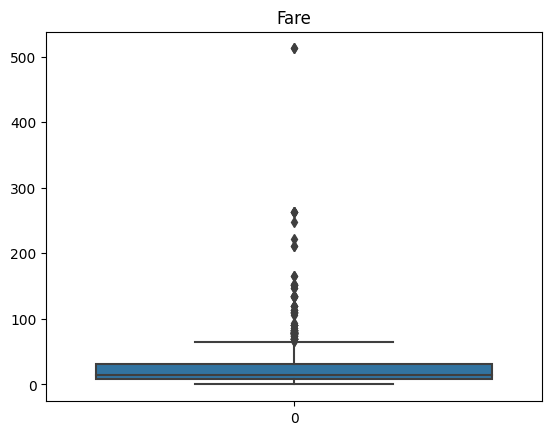

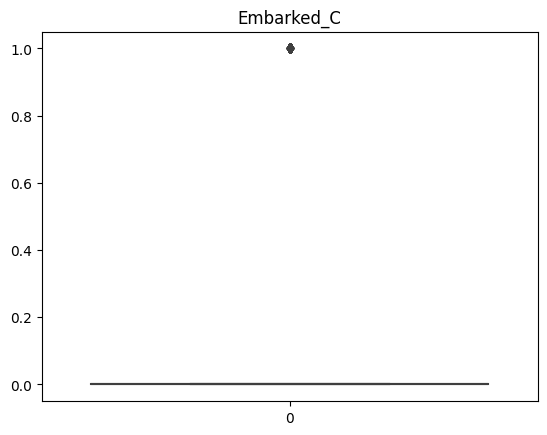

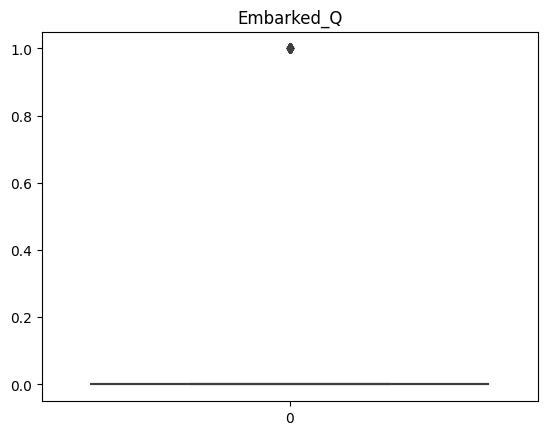

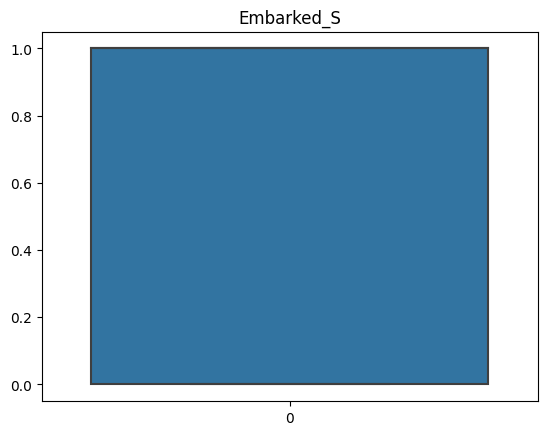

In [58]:
# Checking for outliers with boxplots in training data

def boxplots(col):
    sns.boxplot(olt_x_train[col])
    plt.title(col)
    plt.show()
    
for i in list(olt_x_train.columns)[0:]:
    boxplots(i)

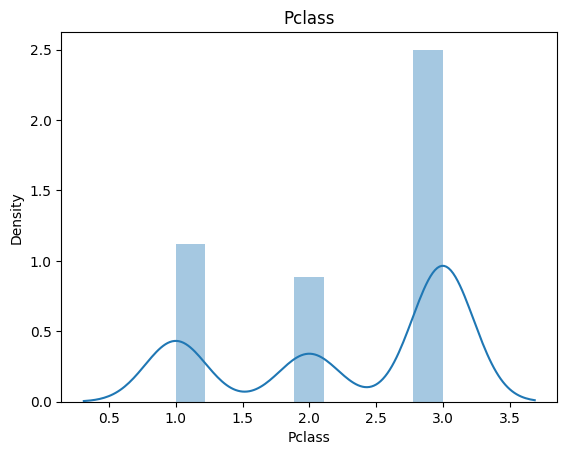

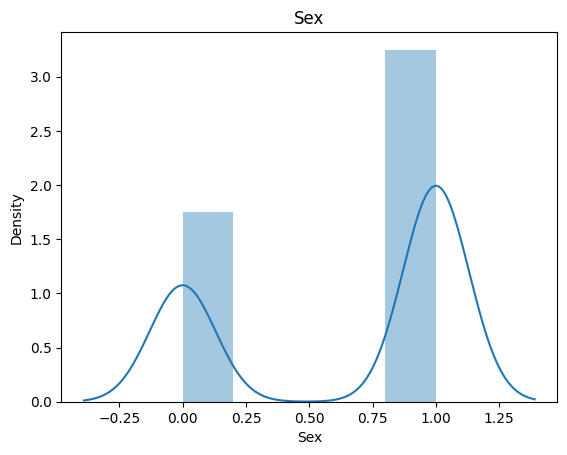

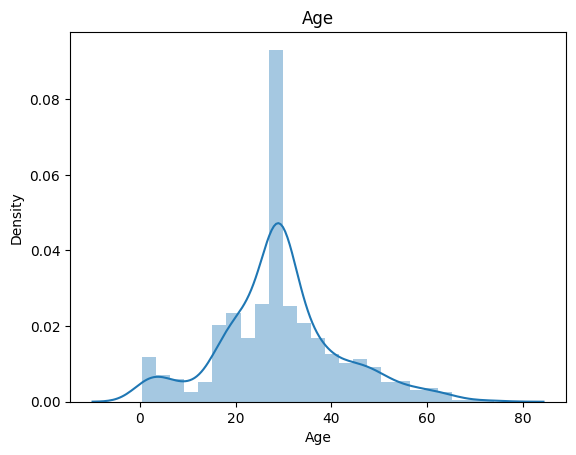

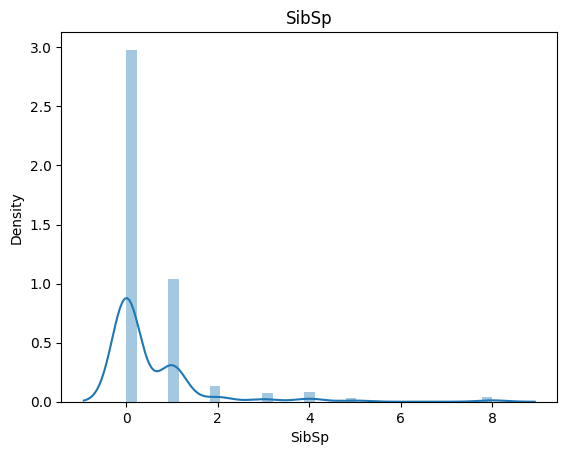

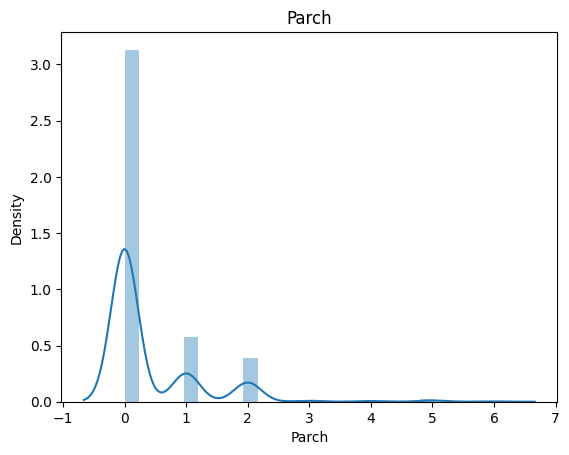

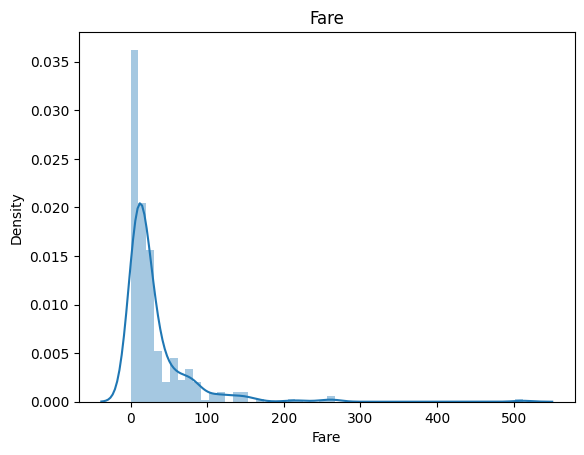

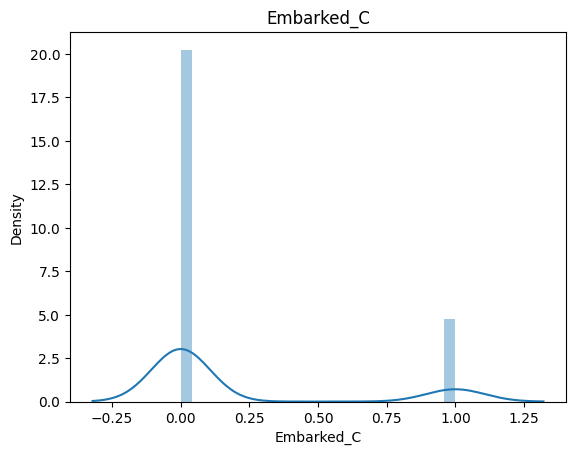

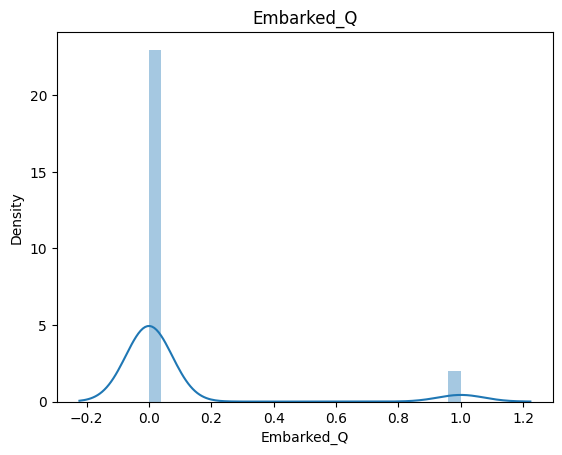

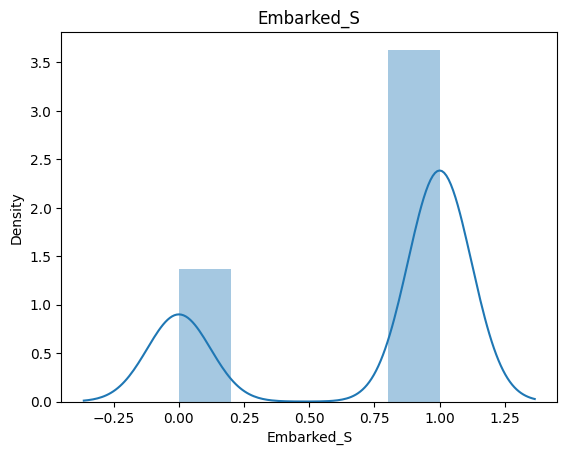

In [59]:
# Checking for skeewness

def distplots(col):
    sns.distplot(olt_x_train[col])
    plt.title(col)
    plt.show()
    
for i in list(olt_x_train.columns)[0:]:
    distplots(i)

From the above boxplots we can see outliers in the below columns
   - Age
   - SibSp
   - Parch - Not treating outliers in this column as it shows some significance in determing the target from EDA
   - Fare

In [60]:
# Using IQR Caping Method

olt_list = ['Age', 'SibSp', 'Fare']

for i in olt_x_train.columns:
    col_q1 = olt_x_train[i].quantile(0.25)
    col_q3 = olt_x_train[i].quantile(0.75)
    col_iqr = col_q3 - col_q1
    
    upper_limit = col_q3 + (1.5 * col_iqr)
    lower_limit = col_q1 - (1.5 * col_iqr)
    
    if i in olt_list:
        olt_x_train[i] = np.where(olt_x_train[i] > upper_limit, upper_limit, 
                                   np.where(olt_x_train[i] < lower_limit, lower_limit, olt_x_train[i]))

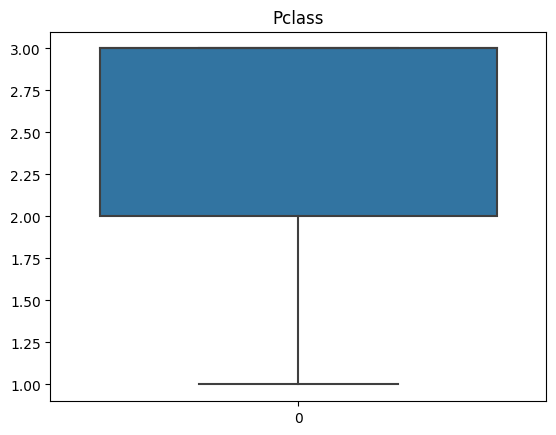

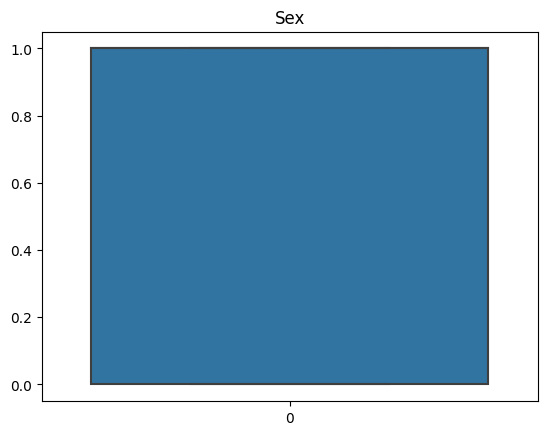

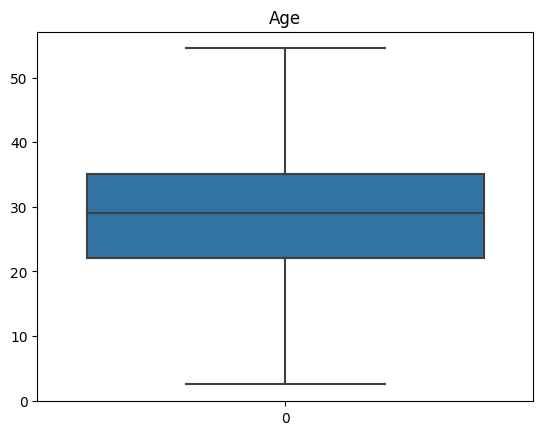

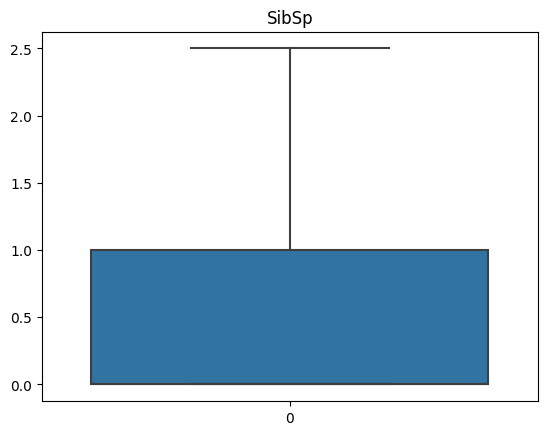

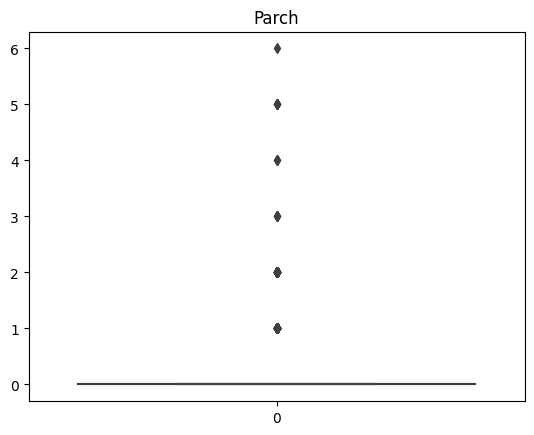

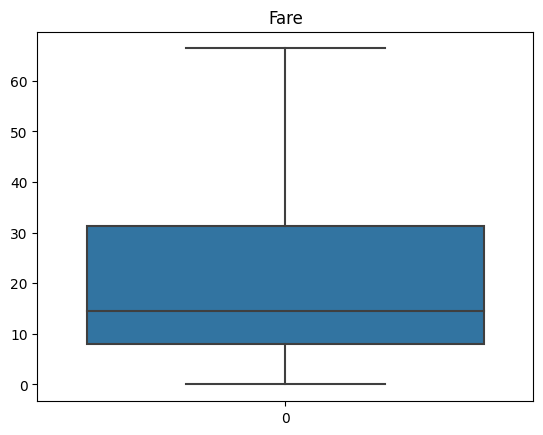

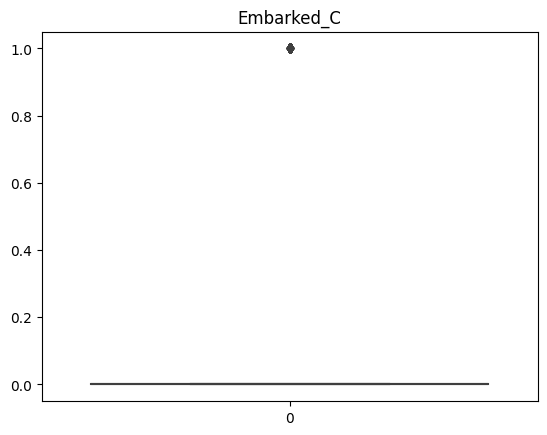

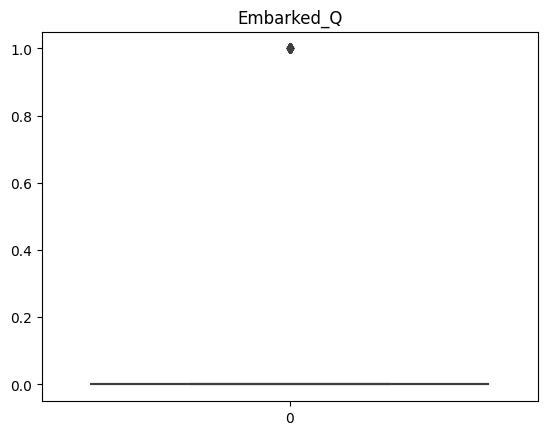

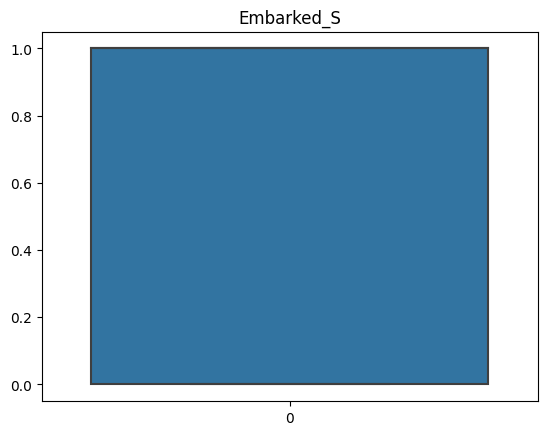

In [61]:
# Checking for outliers with boxplots in test data

for i in list(olt_x_train.columns)[0:]:
    boxplots(i)

In [62]:
# Doing the same treatment for validation data
# Using IQR Caping Method

olt_list = ['Age', 'SibSp', 'Fare']

for i in olt_x_val.columns:
    col_q1 = olt_x_train[i].quantile(0.25)
    col_q3 = olt_x_train[i].quantile(0.75)
    col_iqr = col_q3 - col_q1
    
    upper_limit = col_q3 + (1.5 * col_iqr)
    lower_limit = col_q1 - (1.5 * col_iqr)
    
    if i in olt_list:
        olt_x_val[i] = np.where(olt_x_val[i] > upper_limit, upper_limit, 
                                   np.where(olt_x_val[i] < lower_limit, lower_limit, olt_x_val[i]))

In [63]:
# Building the models on outlier treated raw data and checking the accuracy

# Logistic Regression model
logit_olt = LogisticRegression()
logit_olt.fit(olt_x_train, olt_y_train)
lr_olt_y_pred_train = logit_olt.predict(olt_x_train)
lr_olt_y_pred_val = logit_olt.predict(olt_x_val)

print("Accuracy Score (Logistic Regression - Outlier Treated data)")
logit_train_olt_accuracy = accuracy_score(olt_y_train, lr_olt_y_pred_train)
logit_test_olt_accuracy = accuracy_score(olt_y_val, lr_olt_y_pred_val)
print("Training accuracy :", logit_train_olt_accuracy)
print("**************")
print("Test accuracy :", logit_test_olt_accuracy)
print("**************"*7)

# Ridge Classification (L2 Regularisation)
ridge_olt = RidgeClassifier(alpha = 1.0)
ridge_olt.fit(olt_x_train, olt_y_train)
ridge_olt_y_pred_train = ridge_olt.predict(olt_x_train)
ridge_olt_y_pred_val = ridge_olt.predict(olt_x_val)

print("Accuracy Score (Ridge  Classification model - Outlier Treated data)")
ridge_train_olt_accuracy = accuracy_score(olt_y_train, ridge_olt_y_pred_train)
ridge_test_olt_accuarcy = accuracy_score(olt_y_val, ridge_olt_y_pred_val)
print("Training accuracy :", ridge_train_olt_accuracy)
print("**************")
print("Test accuracy :", ridge_test_olt_accuarcy)
print("**************"*7)

# Decission Tree classifier with Gini Impurity - Max depth chosen after testing different values
dtree_gini_olt = DecisionTreeClassifier(criterion = 'gini', max_depth = 5)
dtree_gini_olt.fit(olt_x_train, olt_y_train)
dtg_olt_y_pred_train = dtree_gini_olt.predict(olt_x_train)
dtg_olt_y_pred_val = dtree_gini_olt.predict(olt_x_val)

print("Accuracy Score (Decission Tree (Gini Impurity) - Outlier Treated data)")
dtg_train_olt_accuracy = accuracy_score(olt_y_train, dtg_olt_y_pred_train)
dtg_test_olt_accuracy = accuracy_score(olt_y_val, dtg_olt_y_pred_val)
print("Training accuracy :", dtg_train_olt_accuracy)
print("**************")
print("Test accuracy :", dtg_test_olt_accuracy)
print("**************"*7)

# Decission Tree classifier with Information Gain - Max depth chosen after testing different values
dtree_gain_olt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
dtree_gain_olt.fit(olt_x_train, olt_y_train)
dtga_olt_y_pred_train = dtree_gain_olt.predict(olt_x_train)
dtga_olt_y_pred_val = dtree_gain_olt.predict(olt_x_val)

print("Accuracy Score (Decission Tree (Information Gain) - Outlier Treated data)")
dtga_train_olt_accuracy = accuracy_score(olt_y_train, dtga_olt_y_pred_train)
dtga_test_olt_accuracy = accuracy_score(olt_y_val, dtga_olt_y_pred_val)
print("Training accuracy :", dtga_train_olt_accuracy)
print("**************")
print("Test accuracy :", dtga_test_olt_accuracy)
print("**************"*7)

# Bagging Classifier 
bagging_olt = BaggingClassifier(max_samples = 100, max_features = 9)
bagging_olt.fit(olt_x_train, olt_y_train)
bagging_olt_y_pred_train = bagging_olt.predict(olt_x_train)
bagging_olt_y_pred_val = bagging_olt.predict(olt_x_val)

print("Accuracy Score (Bagging CLassifier - Outlier Treated data)")
bagging_train_olt_accuracy = accuracy_score(olt_y_train, bagging_olt_y_pred_train)
bagging_test_olt_accuracy = accuracy_score(olt_y_val, bagging_olt_y_pred_val)
print("Training accuracy :", bagging_train_olt_accuracy)
print("**************")
print("Test accuracy :", bagging_test_olt_accuracy)
print("**************"*7)

# Building the Random Forest Model with Information Gain - Parameters chosen after testing various values
rf_gain_olt = RandomForestClassifier(criterion = 'entropy', max_depth = 3, max_features = 7, n_estimators = 600, oob_score = True)
rf_gain_olt.fit(olt_x_train, olt_y_train)
rfga_olt_y_pred_train = rf_gain_olt.predict(olt_x_train)
rfga_olt_y_pred_val = rf_gain_olt.predict(olt_x_val)

print("Accuracy Score (Random Forest CLassifier (Information Gain) - Outlier Treated data)")
rfga_train_olt_accuracy = accuracy_score(olt_y_train, rfga_olt_y_pred_train)
rfga_test_olt_accuracy = accuracy_score(olt_y_val, rfga_olt_y_pred_val)
print("Training accuracy :", rfga_train_olt_accuracy)
print("**************")
print("Test accuracy :", rfga_test_olt_accuracy)
print("**************"*7)
 
# Building the Random Forest Model with Gini Impurity - Parameters chosen after testing various values
rf_gini_olt = RandomForestClassifier(criterion = 'entropy', max_depth = 5, max_features = 7, n_estimators = 600, oob_score = True)
rf_gini_olt.fit(olt_x_train, olt_y_train)
rfg_olt_y_pred_train = rf_gini_olt.predict(olt_x_train)
rfg_olt_y_pred_val = rf_gini_olt.predict(olt_x_val)

print("Accuracy Score (Random Forest CLassifier (Gini Impurity) - Outlier Treated data)")
rfg_train_olt_accuracy = accuracy_score(olt_y_train, rfg_olt_y_pred_train)
rfg_test_olt_accuracy = accuracy_score(olt_y_val, rfg_olt_y_pred_val)
print("Training accuracy :", rfg_train_olt_accuracy)
print("**************")
print("Test accuracy :", rfg_test_olt_accuracy)
print("**************"*7)

# Building the Boosting Classifier models
# Building AdaBoost model
adbst_olt = AdaBoostClassifier()
adbst_olt.fit(olt_x_train, olt_y_train)
adbst_olt_y_pred_train = adbst_olt.predict(olt_x_train)
adbst_olt_y_pred_val = adbst_olt.predict(olt_x_val)

print("Accuracy Score (AdaBoost CLassifier - Outlier Treated data)")
adbst_train_olt_accuracy = accuracy_score(olt_y_train, adbst_olt_y_pred_train)
adbst_test_olt_accuracy = accuracy_score(olt_y_val, adbst_olt_y_pred_val)
print("Training accuracy :", adbst_train_olt_accuracy)
print("**************")
print("Test accuracy :", adbst_test_olt_accuracy)
print("**************"*7)

# Building Gradient Boosting model
gdbst_olt = GradientBoostingClassifier()
gdbst_olt.fit(olt_x_train, olt_y_train)
gdbst_olt_y_pred_train = gdbst_olt.predict(olt_x_train)
gdbst_olt_y_pred_val = gdbst_olt.predict(olt_x_val)

print("Accuracy Score (Gradient Boost CLassifier - Outlier Treated data)")
gdbst_train_olt_accuracy = accuracy_score(olt_y_train, gdbst_olt_y_pred_train)
gdbst_test_olt_accuracy = accuracy_score(olt_y_val, gdbst_olt_y_pred_val)
print("Training accuracy :", gdbst_train_olt_accuracy)
print("**************")
print("Test accuracy :", gdbst_test_olt_accuracy)
print("**************"*7)

# Building Xtra Gradient Boosting model
xgdbst_olt = XGBClassifier()
xgdbst_olt.fit(olt_x_train, olt_y_train)
xgdbst_olt_y_pred_train = xgdbst_olt.predict(olt_x_train)
xgdbst_olt_y_pred_val = xgdbst_olt.predict(olt_x_val)

print("Accuracy Score (XGBoost CLassifier - Outlier Treated data)")
xgdbst_train_olt_accuracy = accuracy_score(olt_y_train, xgdbst_olt_y_pred_train)
xgdbst_test_olt_accuracy = accuracy_score(olt_y_val, xgdbst_olt_y_pred_val)
print("Training accuracy :", xgdbst_train_olt_accuracy)
print("**************")
print("Test accuracy :", xgdbst_test_olt_accuracy)
print("**************"*7)

# Building the SVM Classifier models for different kernels
# Building SVM model - with linear kernel
svm_linear_olt = SVC(kernel = 'linear')
svm_linear_olt.fit(olt_x_train, olt_y_train)
svml_olt_y_pred_train = svm_linear_olt.predict(olt_x_train)
svml_olt_y_pred_val = svm_linear_olt.predict(olt_x_val)

print("Accuracy Score (SVM Classifier (linear kernel) - Outlier Treated data)")
svml_train_olt_accuracy = accuracy_score(olt_y_train, svml_olt_y_pred_train)
svml_test_olt_accuracy = accuracy_score(olt_y_val, svml_olt_y_pred_val)
print("Training accuracy :", svml_train_olt_accuracy)
print("**************")
print("Test accuracy :", svml_test_olt_accuracy)
print("**************"*7)

# Building SVM model - with sigmoid kernel
svm_sigmoid_olt = SVC(kernel = 'sigmoid')
svm_sigmoid_olt.fit(olt_x_train, olt_y_train)
svmg_olt_y_pred_train = svm_sigmoid_olt.predict(olt_x_train)
svmg_olt_y_pred_val = svm_sigmoid_olt.predict(olt_x_val)

print("Accuracy Score (SVM Classifier (sigmoid kernel) - Outlier Treated data)")
svmg_train_olt_accuracy = accuracy_score(olt_y_train, svmg_olt_y_pred_train)
svmg_test_olt_accuracy = accuracy_score(olt_y_val, svmg_olt_y_pred_val)
print("Training accuracy :", svmg_train_olt_accuracy)
print("**************")
print("Test accuracy :", svmg_test_olt_accuracy)
print("**************"*7)

# Building SVM model - with poly kernel
svm_poly_olt = SVC(kernel = 'poly')
svm_poly_olt.fit(olt_x_train, olt_y_train)
svmp_olt_y_pred_train = svm_poly_olt.predict(olt_x_train)
svmp_olt_y_pred_val = svm_poly_olt.predict(olt_x_val)

print("Accuracy Score (SVM Classifier (poly kernel) - Outlier Treated data)")
svmp_train_olt_accuracy = accuracy_score(olt_y_train, svmp_olt_y_pred_train)
svmp_test_olt_accuracy = accuracy_score(olt_y_val, svmp_olt_y_pred_val)
print("Training accuracy :", svmp_train_olt_accuracy)
print("**************")
print("Test accuracy :", svmp_test_olt_accuracy)
print("**************"*7)

# Building SVM model - with RBF kernel
svm_rbf_olt = SVC(kernel = 'rbf')
svm_rbf_olt.fit(olt_x_train, olt_y_train)
svmr_olt_y_pred_train = svm_rbf_olt.predict(olt_x_train)
svmr_olt_y_pred_val = svm_rbf_olt.predict(olt_x_val)

print("Accuracy Score (SVM Classifier (RBF kernel) - Outlier Treated data)")
svmr_train_olt_accuracy = accuracy_score(olt_y_train, svmr_olt_y_pred_train)
svmr_test_olt_accuracy = accuracy_score(olt_y_val, svmr_olt_y_pred_val)
print("Training accuracy :", svmr_train_olt_accuracy)
print("**************")
print("Test accuracy :", svmr_test_olt_accuracy)
print("**************"*7)

Accuracy Score (Logistic Regression - Outlier Treated data)
Training accuracy : 0.8083832335329342
**************
Test accuracy : 0.7847533632286996
**************************************************************************************************
Accuracy Score (Ridge  Classification model - Outlier Treated data)
Training accuracy : 0.8023952095808383
**************
Test accuracy : 0.7892376681614349
**************************************************************************************************
Accuracy Score (Decission Tree (Gini Impurity) - Outlier Treated data)
Training accuracy : 0.8502994011976048
**************
Test accuracy : 0.7757847533632287
**************************************************************************************************
Accuracy Score (Decission Tree (Information Gain) - Outlier Treated data)
Training accuracy : 0.8592814371257484
**************
Test accuracy : 0.7937219730941704
**************************************************************************

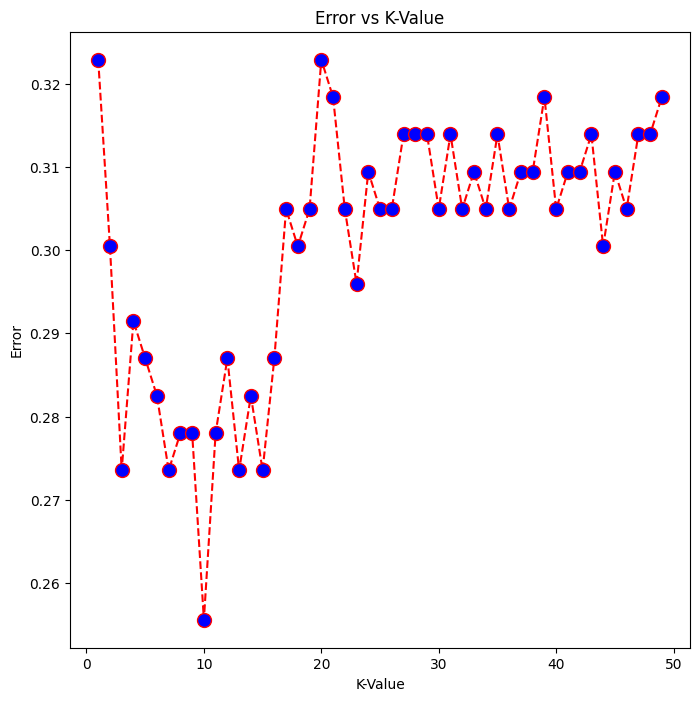

In [64]:
find_k(olt_x_train, olt_y_train, olt_x_val, olt_y_val)

- Error values are less at k=10

In [65]:
# Building KNN model

knn_olt = KNeighborsClassifier(n_neighbors = 10)
knn_olt.fit(olt_x_train, olt_y_train)
knn_olt_y_pred_train = knn_olt.predict(olt_x_train)
knn_olt_y_pred_val = knn_olt.predict(olt_x_val)

print("Accuracy Score (KNN Classifier (k = 10) - Outlier Treated data)")
knn_train_olt_accuracy = accuracy_score(olt_y_train, knn_olt_y_pred_train)
knn_test_olt_accuracy = accuracy_score(olt_y_val, knn_olt_y_pred_val)
print("Training accuracy :", knn_train_olt_accuracy)
print("**************")
print("Test accuracy :", knn_test_olt_accuracy)
print("**************"*7)

Accuracy Score (KNN Classifier (k = 10) - Outlier Treated data)
Training accuracy : 0.7559880239520959
**************
Test accuracy : 0.7443946188340808
**************************************************************************************************


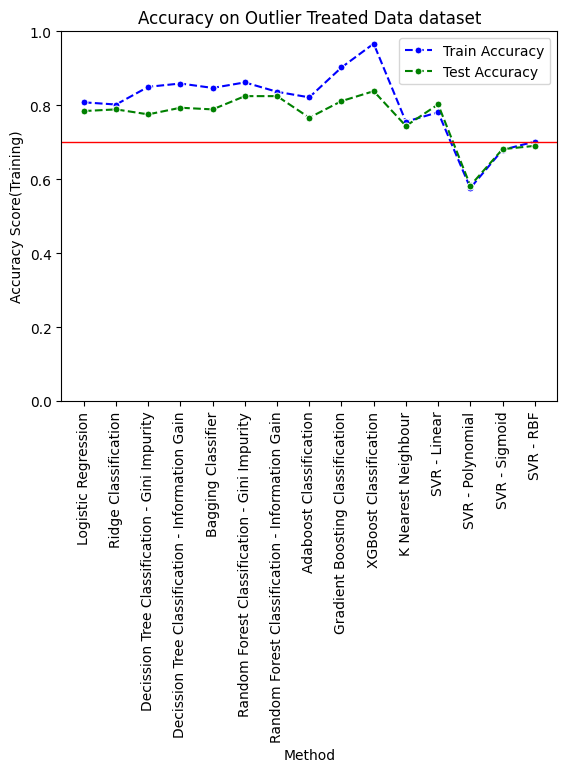

In [66]:
olt_train_accuracy_list = [logit_train_olt_accuracy, ridge_train_olt_accuracy, dtg_train_olt_accuracy, 
                           dtga_train_olt_accuracy, bagging_train_olt_accuracy, rfg_train_olt_accuracy, 
                           rfga_train_olt_accuracy, adbst_train_olt_accuracy, gdbst_train_olt_accuracy, 
                           xgdbst_train_olt_accuracy, knn_train_olt_accuracy, svml_train_olt_accuracy, 
                           svmg_train_olt_accuracy, svmp_train_olt_accuracy, svmr_train_olt_accuracy]

olt_test_accuracy_list = [logit_test_olt_accuracy, ridge_test_olt_accuarcy, dtg_test_olt_accuracy, 
                          dtga_test_olt_accuracy, bagging_test_olt_accuracy, rfg_test_olt_accuracy, 
                          rfga_test_olt_accuracy, adbst_test_olt_accuracy, gdbst_test_olt_accuracy, 
                          xgdbst_test_olt_accuracy, knn_test_olt_accuracy, svml_test_olt_accuracy, 
                          svmg_test_olt_accuracy, svmp_test_olt_accuracy, svmr_test_olt_accuracy]

check_scores(olt_train_accuracy_list, olt_test_accuracy_list, 'Outlier Treated Data')

- XGBoost Classifier achieved the highest test accuracy of 83.9%, indicating strong predictive performance on the outlier-treated dataset.
- Bagging Classifier and Random Forest Classifier (Gini Impurity) demonstrated competitive test accuracies of 81.2% and 82.5%, respectively, showcasing the effectiveness of ensemble techniques.
- Decision Tree (Information Gain) and Gradient Boost Classifier also performed well with test accuracies of 79.4% and 81.2%, respectively, highlighting their individual predictive capabilities.
- SVM models exhibited varying performance. While the SVM Classifier with a Linear Kernel achieved a test accuracy of 80.3%, the models with Sigmoid, Poly, and RBF Kernels showed lower test accuracies ranging from 58.3% to 69.1%.
- Logistic Regression and Ridge Classification demonstrated similar test accuracies of around 78.5% and 78.9%, respectively. The KNN Classifier (k = 1) achieved a test accuracy of 74.4%, placing it among the middle performers.

##### Scaling the outlier treated data

In [67]:
# Using satandardisation technique

ssc = StandardScaler()
scaled_olt_x_train = pd.DataFrame(ssc.fit_transform(olt_x_train))
scaled_olt_y_train = raw_y_train
scaled_olt_x_val = pd.DataFrame(ssc.fit_transform(olt_x_val))
scaled_olt_y_val = raw_y_val

scaled_olt_x_train.head(2)

,0,1,2,3,4,5,6,7,8
0,-1.551302,0.734282,0.829989,-0.60377,-0.48479,-1.173722,-0.484511,-0.29656,0.614263
1,-0.364281,-1.361874,0.075031,-0.60377,-0.48479,-0.549768,-0.484511,-0.29656,0.614263


In [68]:
scaled_olt_x_val.head(2)

,0,1,2,3,4,5,6,7,8
0,0.84211,0.747958,-0.694211,-0.598749,-0.44032,-0.766051,-0.474631,-0.339116,0.634441
1,0.84211,0.747958,-0.051016,-0.598749,-0.44032,-0.720490,2.106899,-0.339116,-1.576190


In [69]:
# Building the models on scaled outlier treated data and checking the accuracy

# Logistic Regression model
logit_scaled_olt = LogisticRegression()
logit_scaled_olt.fit(scaled_olt_x_train, scaled_olt_y_train)
lr_scaled_olt_y_pred_train = logit_scaled_olt.predict(scaled_olt_x_train)
lr_scaled_olt_y_pred_val = logit_scaled_olt.predict(scaled_olt_x_val)

print("Accuracy Score (Logistic Regression - scaled outlier treated data)")
logit_train_scaled_olt_accuracy = accuracy_score(scaled_olt_y_train, lr_scaled_olt_y_pred_train)
logit_test_scaled_olt_accuracy = accuracy_score(scaled_olt_y_val, lr_scaled_olt_y_pred_val)
print("Training accuracy :", logit_train_scaled_olt_accuracy)
print("**************")
print("Test accuracy :", logit_test_scaled_olt_accuracy)
print("**************"*7)

# Ridge Classification (L2 Regularisation)
ridge_scaled_olt = RidgeClassifier(alpha = 1.0)
ridge_scaled_olt.fit(scaled_olt_x_train, scaled_olt_y_train)
ridge_scaled_olt_y_pred_train = ridge_scaled_olt.predict(scaled_olt_x_train)
ridge_scaled_olt_y_pred_val = ridge_scaled_olt.predict(scaled_olt_x_val)

print("Accuracy Score (Ridge  Classification model - scaled outlier treated data)")
ridge_train_scaled_olt_accuracy = accuracy_score(scaled_olt_y_train, ridge_scaled_olt_y_pred_train)
ridge_test_scaled_olt_accuarcy = accuracy_score(scaled_olt_y_val, ridge_scaled_olt_y_pred_val)
print("Training accuracy :", ridge_train_scaled_olt_accuracy)
print("**************")
print("Test accuracy :", ridge_test_scaled_olt_accuarcy)
print("**************"*7)

# Decission Tree classifier with Gini Impurity - Max depth chosen after testing different values
dtree_gini_scaled_olt = DecisionTreeClassifier(criterion = 'gini', max_depth = 5)
dtree_gini_scaled_olt.fit(scaled_olt_x_train, scaled_olt_y_train)
dtg_scaled_olt_y_pred_train = dtree_gini_scaled_olt.predict(scaled_olt_x_train)
dtg_scaled_olt_y_pred_val = dtree_gini_scaled_olt.predict(scaled_olt_x_val)

print("Accuracy Score (Decission Tree (Gini Impurity) - scaled outlier treated data)")
dtg_train_scaled_olt_accuracy = accuracy_score(scaled_olt_y_train, dtg_scaled_olt_y_pred_train)
dtg_test_scaled_olt_accuracy = accuracy_score(scaled_olt_y_val, dtg_scaled_olt_y_pred_val)
print("Training accuracy :", dtg_train_scaled_olt_accuracy)
print("**************")
print("Test accuracy :", dtg_test_scaled_olt_accuracy)
print("**************"*7)

# Decission Tree classifier with Information Gain - Max depth chosen after testing different values
dtree_gain_scaled_olt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
dtree_gain_scaled_olt.fit(scaled_olt_x_train, scaled_olt_y_train)
dtga_scaled_olt_y_pred_train = dtree_gain_scaled_olt.predict(scaled_olt_x_train)
dtga_scaled_olt_y_pred_val = dtree_gain_scaled_olt.predict(scaled_olt_x_val)

print("Accuracy Score (Decission Tree (Information Gain) - scaled outlier treated data)")
dtga_train_scaled_olt_accuracy = accuracy_score(scaled_olt_y_train, dtga_scaled_olt_y_pred_train)
dtga_test_scaled_olt_accuracy = accuracy_score(scaled_olt_y_val, dtga_scaled_olt_y_pred_val)
print("Training accuracy :", dtga_train_scaled_olt_accuracy)
print("**************")
print("Test accuracy :", dtga_test_scaled_olt_accuracy)
print("**************"*7)

# Bagging Classifier 
bagging_scaled_olt = BaggingClassifier(max_samples = 100, max_features = 9)
bagging_scaled_olt.fit(scaled_olt_x_train, scaled_olt_y_train)
bagging_scaled_olt_y_pred_train = bagging_scaled_olt.predict(scaled_olt_x_train)
bagging_scaled_olt_y_pred_val = bagging_scaled_olt.predict(scaled_olt_x_val)

print("Accuracy Score (Bagging CLassifier - scaled outlier treated data)")
bagging_train_scaled_olt_accuracy = accuracy_score(scaled_olt_y_train, bagging_scaled_olt_y_pred_train)
bagging_test_scaled_olt_accuracy = accuracy_score(scaled_olt_y_val, bagging_scaled_olt_y_pred_val)
print("Training accuracy :", bagging_train_scaled_olt_accuracy)
print("**************")
print("Test accuracy :", bagging_test_scaled_olt_accuracy)
print("**************"*7)

# Building the Random Forest Model with Information Gain - Parameters chosen after testing various values
rf_gain_scaled_olt = RandomForestClassifier(criterion = 'entropy', max_depth = 3, max_features = 7, n_estimators = 600, oob_score = True)
rf_gain_scaled_olt.fit(scaled_olt_x_train, scaled_olt_y_train)
rfga_scaled_olt_y_pred_train = rf_gain_scaled_olt.predict(scaled_olt_x_train)
rfga_scaled_olt_y_pred_val = rf_gain_scaled_olt.predict(scaled_olt_x_val)

print("Accuracy Score (Random Forest CLassifier (Information Gain) - scaled outlier treated data)")
rfga_train_scaled_olt_accuracy = accuracy_score(scaled_olt_y_train, rfga_scaled_olt_y_pred_train)
rfga_test_scaled_olt_accuracy = accuracy_score(scaled_olt_y_val, rfga_scaled_olt_y_pred_val)
print("Training accuracy :", rfga_train_scaled_olt_accuracy)
print("**************")
print("Test accuracy :", rfga_test_scaled_olt_accuracy)
print("**************"*7)
 
# Building the Random Forest Model with Gini Impurity - Parameters chosen after testing various values
rf_gini_scaled_olt = RandomForestClassifier(criterion = 'entropy', max_depth = 5, max_features = 7, n_estimators = 600, oob_score = True)
rf_gini_scaled_olt.fit(scaled_olt_x_train, scaled_olt_y_train)
rfg_scaled_olt_y_pred_train = rf_gini_scaled_olt.predict(scaled_olt_x_train)
rfg_scaled_olt_y_pred_val = rf_gini_scaled_olt.predict(scaled_olt_x_val)

print("Accuracy Score (Random Forest CLassifier (Gini Impurity) - scaled outlier treated data)")
rfg_train_scaled_olt_accuracy = accuracy_score(scaled_olt_y_train, rfg_scaled_olt_y_pred_train)
rfg_test_scaled_olt_accuracy = accuracy_score(scaled_olt_y_val, rfg_scaled_olt_y_pred_val)
print("Training accuracy :", rfg_train_scaled_olt_accuracy)
print("**************")
print("Test accuracy :", rfg_test_scaled_olt_accuracy)
print("**************"*7)

# Building the Boosting Classifier models
# Building AdaBoost model
adbst_scaled_olt = AdaBoostClassifier()
adbst_scaled_olt.fit(scaled_olt_x_train, scaled_olt_y_train)
adbst_scaled_olt_y_pred_train = adbst_scaled_olt.predict(scaled_olt_x_train)
adbst_scaled_olt_y_pred_val = adbst_scaled_olt.predict(scaled_olt_x_val)

print("Accuracy Score (AdaBoost CLassifier - scaled outlier treated data)")
adbst_train_scaled_olt_accuracy = accuracy_score(scaled_olt_y_train, adbst_scaled_olt_y_pred_train)
adbst_test_scaled_olt_accuracy = accuracy_score(scaled_olt_y_val, adbst_scaled_olt_y_pred_val)
print("Training accuracy :", adbst_train_scaled_olt_accuracy)
print("**************")
print("Test accuracy :", adbst_test_scaled_olt_accuracy)
print("**************"*7)

# Building Gradient Boosting model
gdbst_scaled_olt = GradientBoostingClassifier()
gdbst_scaled_olt.fit(scaled_olt_x_train, scaled_olt_y_train)
gdbst_scaled_olt_y_pred_train = gdbst_scaled_olt.predict(scaled_olt_x_train)
gdbst_scaled_olt_y_pred_val = gdbst_scaled_olt.predict(scaled_olt_x_val)

print("Accuracy Score (Gradient Boost CLassifier - scaled outlier treated data)")
gdbst_train_scaled_olt_accuracy = accuracy_score(scaled_olt_y_train, gdbst_scaled_olt_y_pred_train)
gdbst_test_scaled_olt_accuracy = accuracy_score(scaled_olt_y_val, gdbst_scaled_olt_y_pred_val)
print("Training accuracy :", gdbst_train_scaled_olt_accuracy)
print("**************")
print("Test accuracy :", gdbst_test_scaled_olt_accuracy)
print("**************"*7)

# Building Xtra Gradient Boosting model
xgdbst_scaled_olt = XGBClassifier()
xgdbst_scaled_olt.fit(scaled_olt_x_train, scaled_olt_y_train)
xgdbst_scaled_olt_y_pred_train = xgdbst_scaled_olt.predict(scaled_olt_x_train)
xgdbst_scaled_olt_y_pred_val = xgdbst_scaled_olt.predict(scaled_olt_x_val)

print("Accuracy Score (XGBoost CLassifier - scaled outlier treated data)")
xgdbst_train_scaled_olt_accuracy = accuracy_score(scaled_olt_y_train, xgdbst_scaled_olt_y_pred_train)
xgdbst_test_scaled_olt_accuracy = accuracy_score(scaled_olt_y_val, xgdbst_scaled_olt_y_pred_val)
print("Training accuracy :", xgdbst_train_scaled_olt_accuracy)
print("**************")
print("Test accuracy :", xgdbst_test_scaled_olt_accuracy)
print("**************"*7)

# Building the SVM Classifier models for different kernels
# Building SVM model - with linear kernel
svm_linear_scaled_olt = SVC(kernel = 'linear')
svm_linear_scaled_olt.fit(scaled_olt_x_train, scaled_olt_y_train)
svml_scaled_olt_y_pred_train = svm_linear_scaled_olt.predict(scaled_olt_x_train)
svml_scaled_olt_y_pred_val = svm_linear_scaled_olt.predict(scaled_olt_x_val)

print("Accuracy Score (SVM Classifier (linear kernel) - scaled outlier treated data)")
svml_train_scaled_olt_accuracy = accuracy_score(scaled_olt_y_train, svml_scaled_olt_y_pred_train)
svml_test_scaled_olt_accuracy = accuracy_score(scaled_olt_y_val, svml_scaled_olt_y_pred_val)
print("Training accuracy :", svml_train_scaled_olt_accuracy)
print("**************")
print("Test accuracy :", svml_test_scaled_olt_accuracy)
print("**************"*7)

# Building SVM model - with sigmoid kernel
svm_sigmoid_scaled_olt = SVC(kernel = 'sigmoid')
svm_sigmoid_scaled_olt.fit(scaled_olt_x_train, scaled_olt_y_train)
svmg_scaled_olt_y_pred_train = svm_sigmoid_scaled_olt.predict(scaled_olt_x_train)
svmg_scaled_olt_y_pred_val = svm_sigmoid_scaled_olt.predict(scaled_olt_x_val)

print("Accuracy Score (SVM Classifier (sigmoid kernel) - scaled outlier treated data)")
svmg_train_scaled_olt_accuracy = accuracy_score(scaled_olt_y_train, svmg_scaled_olt_y_pred_train)
svmg_test_scaled_olt_accuracy = accuracy_score(scaled_olt_y_val, svmg_scaled_olt_y_pred_val)
print("Training accuracy :", svmg_train_scaled_olt_accuracy)
print("**************")
print("Test accuracy :", svmg_test_scaled_olt_accuracy)
print("**************"*7)

# Building SVM model - with poly kernel
svm_poly_scaled_olt = SVC(kernel = 'poly')
svm_poly_scaled_olt.fit(scaled_olt_x_train, scaled_olt_y_train)
svmp_scaled_olt_y_pred_train = svm_poly_scaled_olt.predict(scaled_olt_x_train)
svmp_scaled_olt_y_pred_val = svm_poly_scaled_olt.predict(scaled_olt_x_val)

print("Accuracy Score (SVM Classifier (poly kernel) - scaled outlier treated data)")
svmp_train_scaled_olt_accuracy = accuracy_score(scaled_olt_y_train, svmp_scaled_olt_y_pred_train)
svmp_test_scaled_olt_accuracy = accuracy_score(scaled_olt_y_val, svmp_scaled_olt_y_pred_val)
print("Training accuracy :", svmp_train_scaled_olt_accuracy)
print("**************")
print("Test accuracy :", svmp_test_scaled_olt_accuracy)
print("**************"*7)

# Building SVM model - with RBF kernel
svm_rbf_scaled_olt = SVC(kernel = 'rbf')
svm_rbf_scaled_olt.fit(scaled_olt_x_train, scaled_olt_y_train)
svmr_scaled_olt_y_pred_train = svm_rbf_scaled_olt.predict(scaled_olt_x_train)
svmr_scaled_olt_y_pred_val = svm_rbf_scaled_olt.predict(scaled_olt_x_val)

print("Accuracy Score (SVM Classifier (RBF kernel) - scaled outlier treated data)")
svmr_train_scaled_olt_accuracy = accuracy_score(scaled_olt_y_train, svmr_scaled_olt_y_pred_train)
svmr_test_scaled_olt_accuracy = accuracy_score(scaled_olt_y_val, svmr_scaled_olt_y_pred_val)
print("Training accuracy :", svmr_train_scaled_olt_accuracy)
print("**************")
print("Test accuracy :", svmr_test_scaled_olt_accuracy)
print("**************"*7)

Accuracy Score (Logistic Regression - scaled outlier treated data)
Training accuracy : 0.8098802395209581
**************
Test accuracy : 0.7802690582959642
**************************************************************************************************
Accuracy Score (Ridge  Classification model - scaled outlier treated data)
Training accuracy : 0.8023952095808383
**************
Test accuracy : 0.7892376681614349
**************************************************************************************************
Accuracy Score (Decission Tree (Gini Impurity) - scaled outlier treated data)
Training accuracy : 0.8502994011976048
**************
Test accuracy : 0.7713004484304933
**************************************************************************************************
Accuracy Score (Decission Tree (Information Gain) - scaled outlier treated data)
Training accuracy : 0.8592814371257484
**************
Test accuracy : 0.7982062780269058
**********************************************

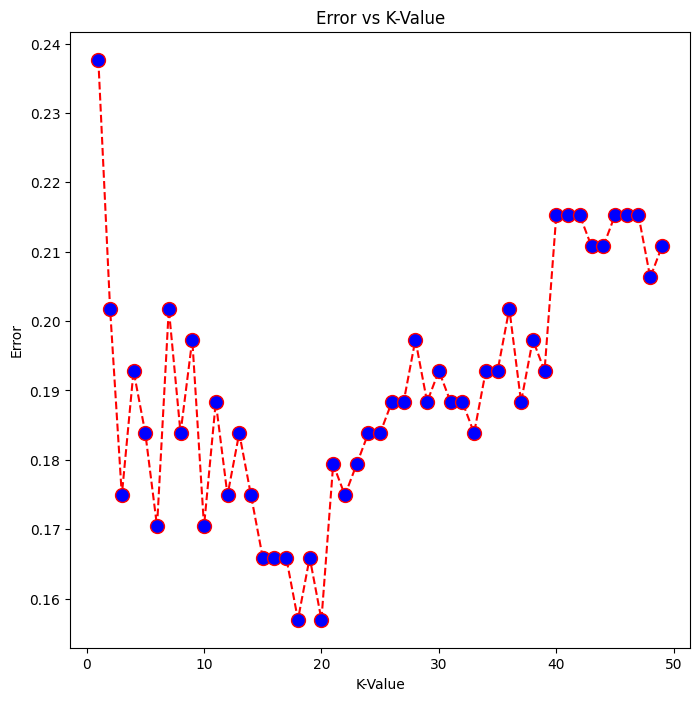

In [70]:
find_k(scaled_olt_x_train, scaled_olt_y_train, scaled_olt_x_val, scaled_olt_y_val)

- Errors minimum at k = 18

In [71]:
# Building KNN model

knn_scaled_olt = KNeighborsClassifier(n_neighbors = 18)
knn_scaled_olt.fit(scaled_olt_x_train, scaled_olt_y_train)
knn_scaled_olt_y_pred_train = knn_scaled_olt.predict(scaled_olt_x_train)
knn_scaled_olt_y_pred_val = knn_scaled_olt.predict(scaled_olt_x_val)

print("Accuracy Score (KNN Classifier (k = 18) - Scaled Outlier Treated data)")
knn_train_scaled_olt_accuracy = accuracy_score(scaled_olt_y_train, knn_scaled_olt_y_pred_train)
knn_test_scaled_olt_accuracy = accuracy_score(scaled_olt_y_val, knn_scaled_olt_y_pred_val)
print("Training accuracy :", knn_train_scaled_olt_accuracy)
print("**************")
print("Test accuracy :", knn_test_scaled_olt_accuracy)
print("**************"*7)

Accuracy Score (KNN Classifier (k = 18) - Scaled Outlier Treated data)
Training accuracy : 0.8338323353293413
**************
Test accuracy : 0.8430493273542601
**************************************************************************************************


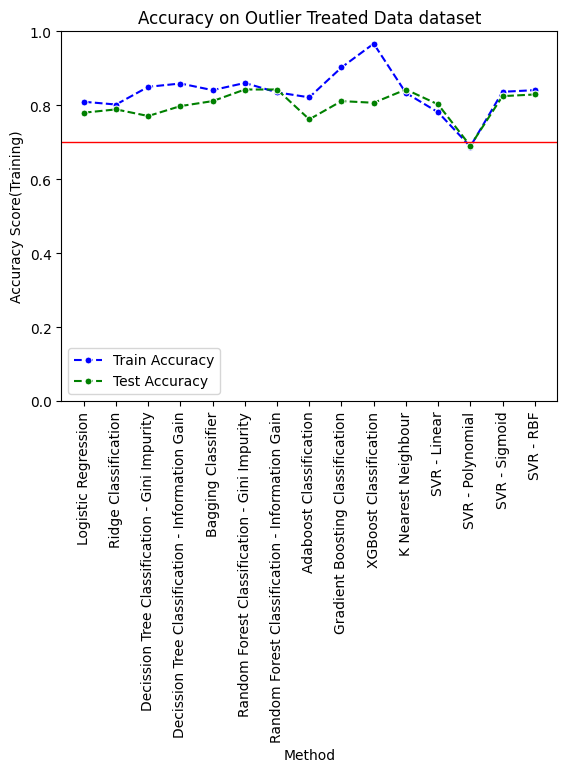

In [72]:
scaled_olt_train_accuracy_list = [logit_train_scaled_olt_accuracy, ridge_train_scaled_olt_accuracy, dtg_train_scaled_olt_accuracy, 
                           dtga_train_scaled_olt_accuracy, bagging_train_scaled_olt_accuracy, rfg_train_scaled_olt_accuracy, 
                           rfga_train_scaled_olt_accuracy, adbst_train_scaled_olt_accuracy, gdbst_train_scaled_olt_accuracy, 
                           xgdbst_train_scaled_olt_accuracy, knn_train_scaled_olt_accuracy, svml_train_scaled_olt_accuracy, 
                           svmg_train_scaled_olt_accuracy, svmp_train_scaled_olt_accuracy, svmr_train_scaled_olt_accuracy]

scaled_olt_test_accuracy_list = [logit_test_scaled_olt_accuracy, ridge_test_scaled_olt_accuarcy, dtg_test_scaled_olt_accuracy, 
                          dtga_test_scaled_olt_accuracy, bagging_test_scaled_olt_accuracy, rfg_test_scaled_olt_accuracy, 
                          rfga_test_scaled_olt_accuracy, adbst_test_scaled_olt_accuracy, gdbst_test_scaled_olt_accuracy, 
                          xgdbst_test_scaled_olt_accuracy, knn_test_scaled_olt_accuracy, svml_test_scaled_olt_accuracy, 
                          svmg_test_scaled_olt_accuracy, svmp_test_scaled_olt_accuracy, svmr_test_scaled_olt_accuracy]

check_scores(scaled_olt_train_accuracy_list, scaled_olt_test_accuracy_list, 'Outlier Treated Data')

- Random Forest Classifier with Gini Impurity achieved the highest test accuracy of 84.8%, indicating strong predictive performance on the scaled outlier-treated dataset.
- Bagging Classifier and Random Forest Classifier with Information Gain demonstrated competitive test accuracies of 81.6% and 84.3%, respectively, showcasing the effectiveness of ensemble techniques on the scaled outlier-treated data.
- Several models, including Logistic Regression, Ridge Classification, Decision Tree (Information Gain), Gradient Boost Classifier, and XGBoost Classifier, exhibited consistent test accuracies ranging from 78.0% to 81.2%.
- SVM models with different kernels showed varying performance. While SVM with RBF kernel achieved a test accuracy of 82.9%, the models with linear and sigmoid kernels had test accuracies of 80.3% and 69.1%, respectively.
- The KNN Classifier with k=18 achieved a test accuracy of 84.3%, demonstrating competitive performance among the models on the scaled outlier-treated data.

In [73]:
# logit_raw_coefficients = logit_raw.coef_[0]
# ridge_raw_coefficients = ridge_raw.coef_[0]
# dtg_raw_feature_importances = dtree_gini_raw.feature_importances_
# dtga_raw_feature_importances = dtree_gain_raw.feature_importances_
# bagging_raw_feature_importances = bagging_raw.base_estimator_.feature_importances_
# bagging_raw_feature_importances

#### Cross Validation of the top 4 models

##### Top 4 models
- Random Forest Classifier (Gini Impurity) - scaled outlier treated data - Training accuracy: 85.93% - Test accuracy: 84.75%
- Random Forest Classifier (Information Gain) - scaled data - Training accuracy: 83.83% - Test accuracy: 84.30%
- Random Forest Classifier (Information Gain) - scaled outlier treated data - Training accuracy: 83.83%- Test accuracy: 84.30%
- KNN Classifier (k = 18) - Scaled Outlier Treated data - Training accuracy: 83.38% - Test accuracy: 84.30%

In [74]:
# Cross validation of Random Forest Classifier (Gini Impurity) - scaled outlier treated data 

train_cv_rf_gini_scaled_olt = cross_val_score(rf_gini_scaled_olt, scaled_olt_x_train, scaled_olt_y_train, cv = 10)
test_cv_rf_gini_scaled_olt = cross_val_score(rf_gini_scaled_olt, scaled_olt_x_val, scaled_olt_y_val, cv = 10)

print("Cross Validation Scores")
print("Train Mean Accuracy", train_cv_rf_gini_scaled_olt.mean())
print("**************")
print("Train Max Accuracy", train_cv_rf_gini_scaled_olt.max())
print("**************"*7)
print("Test Mean Accuracy", test_cv_rf_gini_scaled_olt.mean())
print("**************")
print("Test Max Accuracy", test_cv_rf_gini_scaled_olt.max())
print("**************"*7)

Cross Validation Scores
Train Mean Accuracy 0.81438263229308
**************
Train Max Accuracy 0.8656716417910447
**************************************************************************************************
Test Mean Accuracy 0.808300395256917
**************
Test Max Accuracy 0.9545454545454546
**************************************************************************************************


In [75]:
# Cross validation of Random Forest Classifier (Information Gain) - scaled data

train_cv_rf_gain_scaled = cross_val_score(rf_gain_scaled, scaled_x_train, scaled_y_train, cv = 10)
test_cv_rf_gain_scaled = cross_val_score(rf_gain_scaled, scaled_x_val, scaled_y_val, cv = 10)

print("Cross Validation Scores")
print("Train Mean Accuracy", train_cv_rf_gain_scaled.mean())
print("**************")
print("Train Max Accuracy", train_cv_rf_gain_scaled.max())
print("**************"*7)
print("Test Mean Accuracy", test_cv_rf_gain_scaled.mean())
print("**************")
print("Test Max Accuracy", test_cv_rf_gain_scaled.max())
print("**************"*7)

Cross Validation Scores
Train Mean Accuracy 0.8173903211216645
**************
Train Max Accuracy 0.8805970149253731
**************************************************************************************************
Test Mean Accuracy 0.8126482213438735
**************
Test Max Accuracy 0.9565217391304348
**************************************************************************************************


In [76]:
# Cross validation of Random Forest Classifier (Information Gain) - scaled outlier treated data

train_cv_rf_gain_scaled_olt = cross_val_score(rf_gain_scaled_olt, scaled_olt_x_train, scaled_olt_y_train, cv = 10)
test_cv_rf_gain_scaled_olt = cross_val_score(rf_gain_scaled_olt, scaled_olt_x_val, scaled_olt_y_val, cv = 10)

print("Cross Validation Scores")
print("Train Mean Accuracy", train_cv_rf_gain_scaled_olt.mean())
print("**************")
print("Train Max Accuracy", train_cv_rf_gain_scaled_olt.max())
print("**************"*7)
print("Test Mean Accuracy", test_cv_rf_gain_scaled_olt.mean())
print("**************")
print("Test Max Accuracy", test_cv_rf_gain_scaled_olt.max())
print("**************"*7)

Cross Validation Scores
Train Mean Accuracy 0.8144052464947988
**************
Train Max Accuracy 0.8805970149253731
**************************************************************************************************
Test Mean Accuracy 0.8126482213438735
**************
Test Max Accuracy 0.9565217391304348
**************************************************************************************************


In [77]:
# Cross validation of KNN Classifier (k = 18) - Scaled Outlier Treated data 

train_cv_knn_scaled_olt = cross_val_score(knn_scaled_olt, scaled_olt_x_train, scaled_olt_y_train, cv = 10)
test_cv_knn_scaled_olt = cross_val_score(knn_scaled_olt, scaled_olt_x_val, scaled_olt_y_val, cv = 10)

print("Cross Validation Scores")
print("Train Mean Accuracy", train_cv_knn_scaled_olt.mean())
print("**************")
print("Train Max Accuracy", train_cv_knn_scaled_olt.max())
print("**************"*7)
print("Test Mean Accuracy", test_cv_knn_scaled_olt.mean())
print("**************")
print("Test Max Accuracy", test_cv_knn_scaled_olt.max())
print("**************"*7)

Cross Validation Scores
Train Mean Accuracy 0.8068747173224786
**************
Train Max Accuracy 0.8656716417910447
**************************************************************************************************
Test Mean Accuracy 0.7630434782608695
**************
Test Max Accuracy 0.9130434782608695
**************************************************************************************************


- From the above after cross validation Random Forest Classifier (Gini Impurity) - scaled outlier treated data seems to be the best model
- Building the output based on the above model

#### Building the output file

In [78]:
# Saving the model

model = rf_gini_scaled_olt

In [79]:
# Reading the test dataset

test_df = pd.read_csv("01_test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [80]:
# Performing the same preprocessing as training data

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [81]:
# Droping cabin as significant rows are missing 

test_df = test_df.drop(['Cabin'], axis = 1)
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


In [82]:
# Imputing the outliers 

test_df['Age'] = test_df['Age'].fillna(train_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(train_df['Fare'].median())
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [83]:
# Droping the insignificant and more diverse object variables

test_df = test_df.drop(['Name', 'Ticket'], axis = 1)
test_df.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S


In [84]:
# Proceeding with encoding
# Label encoder on Sex column

test_df['Sex'] = test_df['Sex'].astype('category')
test_df['Sex'] = test_df['Sex'].cat.codes
test_df.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,Q
1,893,3,0,47.0,1,0,7.0000,S


In [85]:
# ONE HOT encoder on Embarked column

test_df = pd.get_dummies(test_df, columns = ['Embarked'])
test_df.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,34.5,0,0,7.8292,0,1,0
1,893,3,0,47.0,1,0,7.0000,0,0,1


In [86]:
# Removing the passenger id column before building any model

pid_df = test_df['PassengerId']
test_df = test_df.drop(['PassengerId'], axis = 1)
test_df.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1


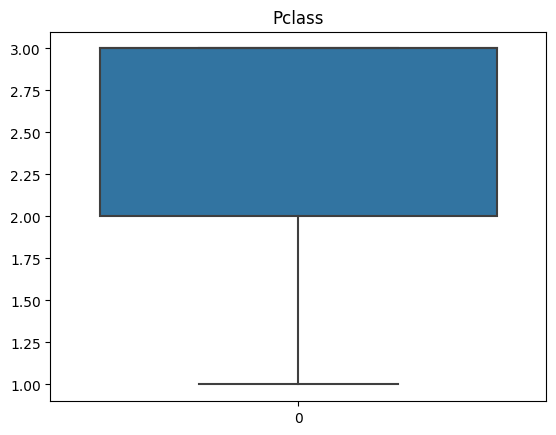

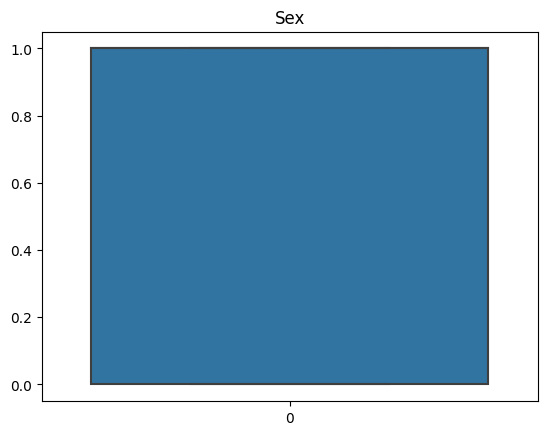

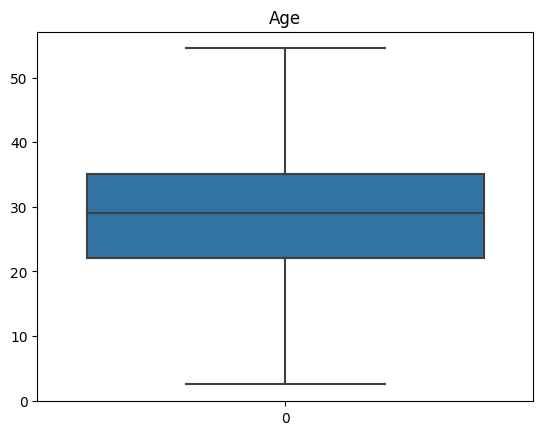

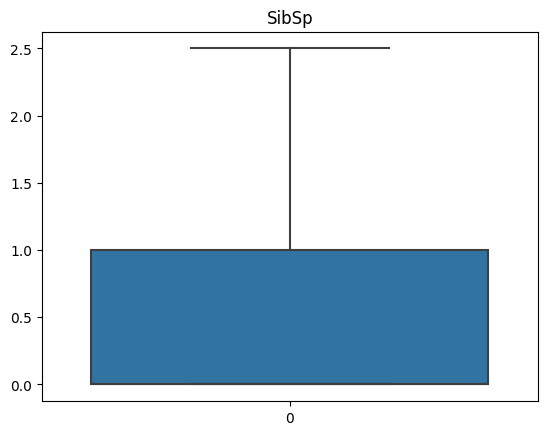

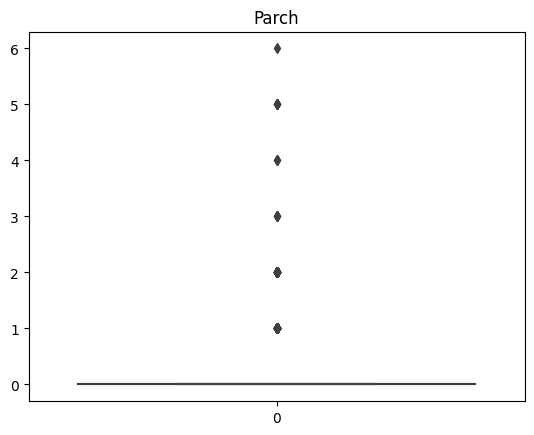

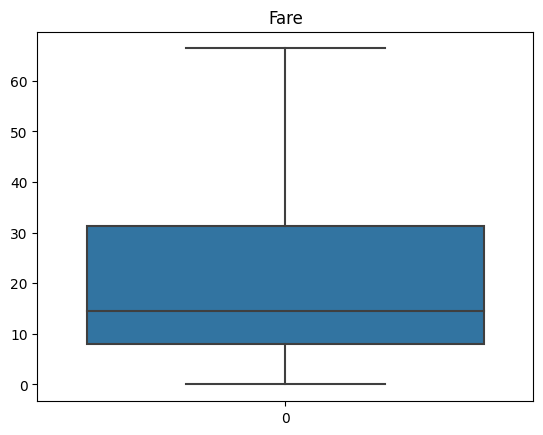

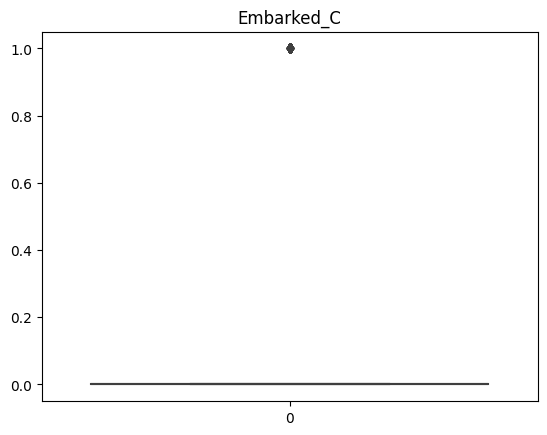

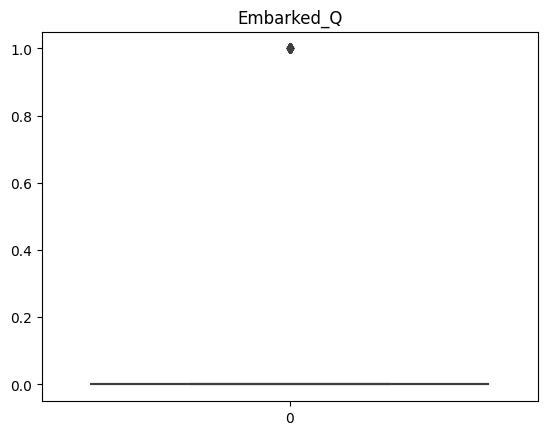

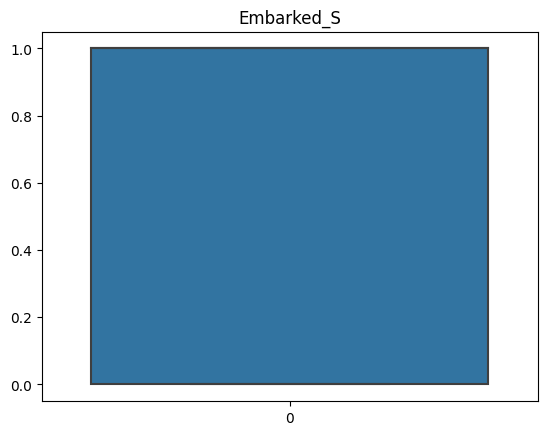

In [87]:
# Treating the outliers

for i in list(test_df.columns)[0:]:
    boxplots(i)

- There are no outliers in the test file

In [88]:
# Scaling the features

final_ssc = StandardScaler()
test_df = pd.DataFrame(ssc.fit_transform(test_df))
test_df.head(2)

,0,1,2,3,4,5,6,7,8
0,0.873482,0.755929,0.355445,-0.499470,-0.400248,-0.497416,-0.568142,2.843757,-1.350676
1,0.873482,-1.322876,1.345161,0.616992,-0.400248,-0.512280,-0.568142,-0.351647,0.740370


In [89]:
# Building the model

final_prediction = model.predict(test_df)
final_prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [90]:
# Building the output file

final_result = pd.concat([pid_df, pd.DataFrame(final_prediction)], axis = 1)
final_result = final_result.rename(columns = {0 : "Survived"})
final_result.set_index('PassengerId', inplace=True)
final_result

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [91]:
final_result.to_csv("Titanic_submission.csv")